<a href="https://colab.research.google.com/github/HosnawHb/Tensorflow-Student-Academic-Performance/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import io
import seaborn as sn
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#df = pd.read_csv(io.BytesIO(uploaded['StData.csv']))
!gdown --id 1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
df = pd.read_csv('/content/Dataset.csv')

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1-Zyp-JP3f9QhPKaErBkPPFNKaPS1v74u
To: /content/Dataset.csv
100% 38.0k/38.0k [00:00<00:00, 38.0MB/s]


In [ ]:
df.head(15)

gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic  \
0       M          KW       KuwaIT    lowerlevel    G-04         A    IT   
1       M          KW       KuwaIT    lowerlevel    G-04         A    IT   
2       M          KW       KuwaIT    lowerlevel    G-04         A    IT   
3       M          KW       KuwaIT    lowerlevel    G-04         A    IT   
4       M          KW       KuwaIT    lowerlevel    G-04         A    IT   
5       F          KW       KuwaIT    lowerlevel    G-04         A    IT   
6       M          KW       KuwaIT  MiddleSchool    G-07         A  Math   
7       M          KW       KuwaIT  MiddleSchool    G-07         A  Math   
8       F          KW       KuwaIT  MiddleSchool    G-07         A  Math   
9       F          KW       KuwaIT  MiddleSchool    G-07         B    IT   
10      M          KW       KuwaIT  MiddleSchool    G-07         A  Math   
11      M          KW       KuwaIT  MiddleSchool    G-07         B  Math   
12      M          KW       KuwaIT    lowerlevel    G-04         A    IT   
13      M     lebanon      lebanon  MiddleSchool    G-08         A  Math   
14      F          KW       KuwaIT  MiddleSchool    G-08         A  Math   

   Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0         F   Father           15                16                  2   
1         F   Father           20                20                  3   
2         F   Father           10                 7                  0   
3         F   Father           30                25                  5   
4         F   Father           40                50                 12   
5         F   Father           42                30                 13   
6         F   Father           35                12                  0   
7         F   Father           50                10                 15   
8         F   Father           12                21                 16   
9         F   Father           70                80                 25   
10        F   Father           50                88                 30   
11        F   Father           19                 6                 19   
12        F   Father            5                 1                  0   
13        F   Father           20                14                 12   
14        F      Mum           62                70                 44   

    Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0           20                   Yes                     Good   
1           25                   Yes                     Good   
2           30                    No                      Bad   
3           35                    No                      Bad   
4           50                    No                      Bad   
5           70                   Yes                      Bad   
6           17                    No                      Bad   
7           22                   Yes                     Good   
8           50                   Yes                     Good   
9           70                   Yes                     Good   
10          80                   Yes                     Good   
11          12                   Yes                     Good   
12          11                    No                      Bad   
13          19                    No                      Bad   
14          60                    No                      Bad   

   StudentAbsenceDays Class  
0             Under-7     M  
1             Under-7     M  
2             Above-7     L  
3             Above-7     L  
4             Above-7     M  
5             Above-7     M  
6             Above-7     L  
7             Under-7     M  
8             Under-7     M  
9             Under-7     M  
10            Under-7     H  
11            Under-7     M  
12            Above-7     L  
13            Above-7     L  
14            Above-7     H

In [ ]:
ca = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [ ]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[ca] = df[ca].apply(le.fit_transform, axis=0)

In [ ]:
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [ ]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

In [ ]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))
print("X_train: ",str(X_train.shape))
print("y_train: " ,str(y_train.shape))
print("X_val: " ,str(X_val.shape))
print("y_val:" ,str(y_val.shape))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96
X_train:  (384, 16)
y_train:  (384,)
X_val:  (96, 16)
y_val: (96,)


In [ ]:
y_train = y_train.reshape(y_train.shape[0],1)
y_val =  y_val.reshape(y_val.shape[0], 1)
#X_train = X_train.T
#X_val = X_val.T

In [ ]:
print("X_train: ",str(X_train.shape))
print("y_train: " ,str(y_train.shape))
print("X_val: " ,str(X_val.shape))
print("y_val:" ,str(y_val.shape))

X_train:  (384, 16)
y_train:  (384, 1)
X_val:  (96, 16)
y_val: (96, 1)


In [ ]:
df.head(15)

gender  NationalITy  PlaceofBirth  StageID  GradeID  SectionID  Topic  \
0        1            4             4        2        1          0      7   
1        1            4             4        2        1          0      7   
2        1            4             4        2        1          0      7   
3        1            4             4        2        1          0      7   
4        1            4             4        2        1          0      7   
5        0            4             4        2        1          0      7   
6        1            4             4        1        4          0      8   
7        1            4             4        1        4          0      8   
8        0            4             4        1        4          0      8   
9        0            4             4        1        4          1      7   
10       1            4             4        1        4          0      8   
11       1            4             4        1        4          1      8   
12       1            4             4        2        1          0      7   
13       1           12            12        1        5          0      8   
14       0            4             4        1        5          0      8   

    Semester  Relation  raisedhands  VisITedResources  AnnouncementsView  \
0          0         0           15                16                  2   
1          0         0           20                20                  3   
2          0         0           10                 7                  0   
3          0         0           30                25                  5   
4          0         0           40                50                 12   
5          0         0           42                30                 13   
6          0         0           35                12                  0   
7          0         0           50                10                 15   
8          0         0           12                21                 16   
9          0         0           70                80                 25   
10         0         0           50                88                 30   
11         0         0           19                 6                 19   
12         0         0            5                 1                  0   
13         0         0           20                14                 12   
14         0         1           62                70                 44   

    Discussion  ParentAnsweringSurvey  ParentschoolSatisfaction  \
0           20                      1                         1   
1           25                      1                         1   
2           30                      0                         0   
3           35                      0                         0   
4           50                      0                         0   
5           70                      1                         0   
6           17                      0                         0   
7           22                      1                         1   
8           50                      1                         1   
9           70                      1                         1   
10          80                      1                         1   
11          12                      1                         1   
12          11                      0                         0   
13          19                      0                         0   
14          60                      0                         0   

    StudentAbsenceDays  Class  
0                    1      2  
1                    1      2  
2                    0      1  
3                    0      1  
4                    0      2  
5                    0      2  
6                    0      1  
7                    1      2  
8                    1      2  
9                    1      2  
10                   1      0  
11                   1      2  
12                   0      1  
13                   0      1  
1

# Data Visualization

In [ ]:
df.dtypes

gender                      int64
NationalITy                 int64
PlaceofBirth                int64
StageID                     int64
GradeID                     int64
SectionID                   int64
Topic                       int64
Semester                    int64
Relation                    int64
raisedhands                 int64
VisITedResources            int64
AnnouncementsView           int64
Discussion                  int64
ParentAnsweringSurvey       int64
ParentschoolSatisfaction    int64
StudentAbsenceDays          int64
Class                       int64
dtype: object

In [ ]:
#data analysis
class_zero = df[df.Class==0].raisedhands
class_one = df[df.Class==1].raisedhands
class_two = df[df.Class==2].raisedhands
plt.xlabel("raisedhands")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


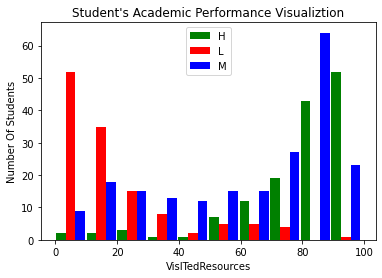

In [ ]:
#data analysis
class_zero = df[df.Class==0].VisITedResources
class_one = df[df.Class==1].VisITedResources
class_two = df[df.Class==2].VisITedResources
plt.xlabel("VisITedResources")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


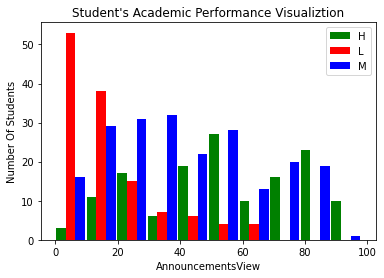

In [ ]:
#data analysis
class_zero = df[df.Class==0].AnnouncementsView
class_one = df[df.Class==1].AnnouncementsView
class_two = df[df.Class==2].AnnouncementsView
plt.xlabel("AnnouncementsView")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


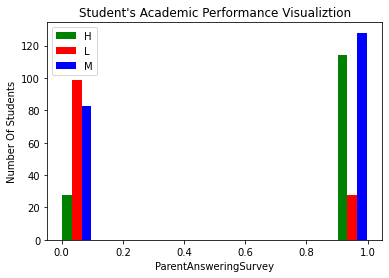

In [ ]:
class_zero = df[df.Class==0].ParentAnsweringSurvey
class_one = df[df.Class==1].ParentAnsweringSurvey
class_two = df[df.Class==2].ParentAnsweringSurvey
plt.xlabel("ParentAnsweringSurvey")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


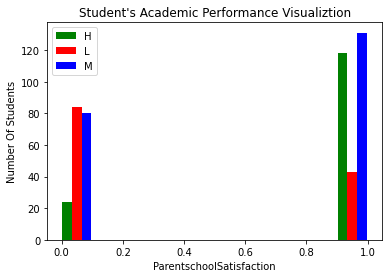

In [ ]:
class_zero = df[df.Class==0].ParentschoolSatisfaction
class_one = df[df.Class==1].ParentschoolSatisfaction
class_two = df[df.Class==2].ParentschoolSatisfaction
plt.xlabel("ParentschoolSatisfaction")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


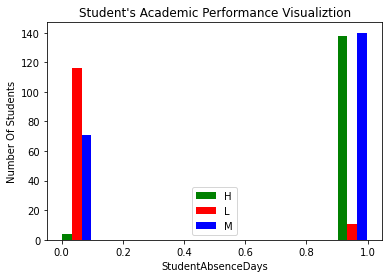

In [ ]:
class_zero = df[df.Class==0].StudentAbsenceDays
class_one = df[df.Class==1].StudentAbsenceDays
class_two = df[df.Class==2].StudentAbsenceDays
plt.xlabel("StudentAbsenceDays")
plt.ylabel("Number Of Students")
plt.title("Student's Academic Performance Visualiztion")
plt.hist([class_zero,class_one,class_two], rwidth=0.95, color=['green','red','blue'],label=['H','L','M'])
plt.legend()

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
X_train.shape

(384, 16)

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Activation
from keras import regularizers
from keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization

# MODEL DESIGN

# Adam-relu-3hidden layers-78

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.0426 - accuracy: 0.4349 - val_loss: 0.9957 - val_accuracy: 0.6146
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9569 - accuracy: 0.5859 - val_loss: 0.9287 - val_accuracy: 0.6562
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8856 - accuracy: 0.6198 - val_loss: 0.8659 - val_accuracy: 0.6979
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8199 - accuracy: 0.6536 - val_loss: 0.8008 - val_accuracy: 0.6875
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7527 - accuracy: 0.6849 - val_loss: 0.7587 - val_accuracy: 0.6458
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.7370 - val_loss: 0.7137 - val_accuracy: 0.6875
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6376 - accuracy: 0.7552 - val_loss: 0.6846 - val_accuracy: 0.6667
Epoch 8/100


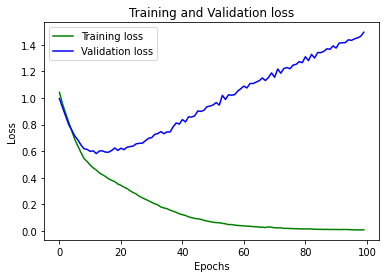

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

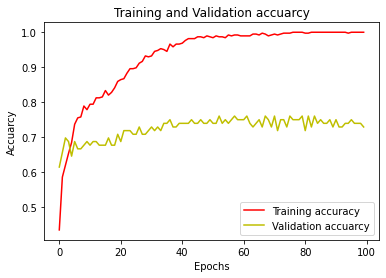

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

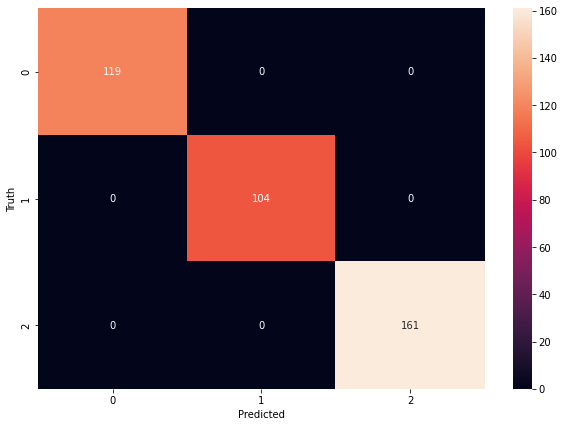

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.78      0.65        23
           1       0.86      0.83      0.84        23
           2       0.79      0.66      0.72        50

    accuracy                           0.73        96
   macro avg       0.74      0.76      0.74        96
weighted avg       0.75      0.73      0.73        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-relu-4hidden layers-76

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 31ms/step - loss: 1.0737 - accuracy: 0.4349 - val_loss: 1.0447 - val_accuracy: 0.5521
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0111 - accuracy: 0.5052 - val_loss: 0.9748 - val_accuracy: 0.6146
Epoch 3/100
12/12 [==============================] - 0s 12ms/step - loss: 0.9352 - accuracy: 0.5339 - val_loss: 0.8834 - val_accuracy: 0.6458
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8383 - accuracy: 0.5651 - val_loss: 0.7806 - val_accuracy: 0.6667
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7396 - accuracy: 0.6120 - val_loss: 0.6910 - val_accuracy: 0.6875
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6571 - accuracy: 0.7500 - val_loss: 0.6311 - val_accuracy: 0.7812
Epoch 7/100
12/12 [==============================] - 0s 11ms/step - loss: 0.5906 - accuracy: 0.7604 - val_loss: 0.5872 - val_accuracy: 0.7917
Epoch 8/10

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

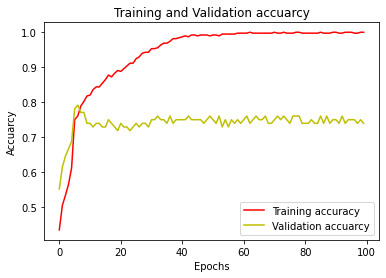

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

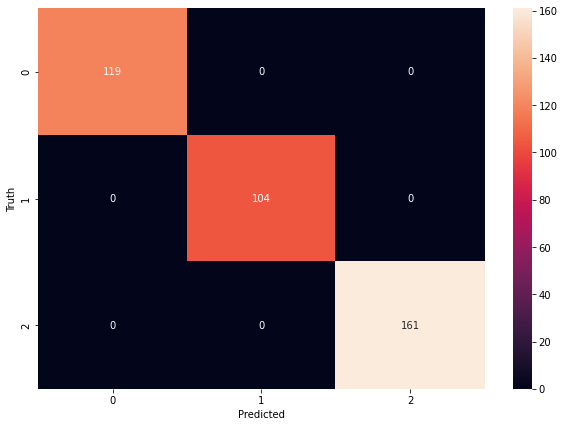

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.95      0.78      0.86        23
           2       0.75      0.76      0.75        50

    accuracy                           0.74        96
   macro avg       0.76      0.73      0.74        96
weighted avg       0.75      0.74      0.74        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-relu-5hidden layers-74

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 35ms/step - loss: 1.0764 - accuracy: 0.4193 - val_loss: 1.0284 - val_accuracy: 0.5312
Epoch 2/100
12/12 [==============================] - 0s 9ms/step - loss: 1.0132 - accuracy: 0.4245 - val_loss: 0.9710 - val_accuracy: 0.5104
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 0.9299 - accuracy: 0.4844 - val_loss: 0.8836 - val_accuracy: 0.6771
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8213 - accuracy: 0.6458 - val_loss: 0.7850 - val_accuracy: 0.6354
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7235 - accuracy: 0.6823 - val_loss: 0.7131 - val_accuracy: 0.6354
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6538 - accuracy: 0.6875 - val_loss: 0.6714 - val_accuracy: 0.6146
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.7214 - val_loss: 0.6324 - val_accuracy: 0.6979
Epoch 8/100

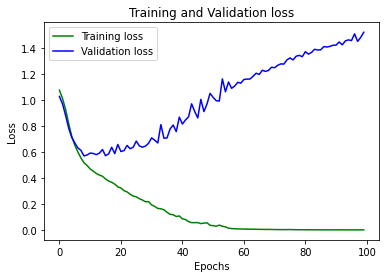

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

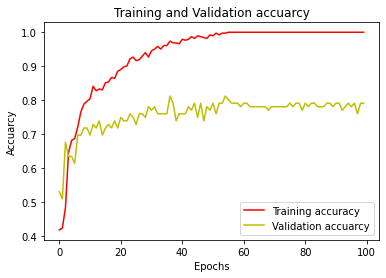

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

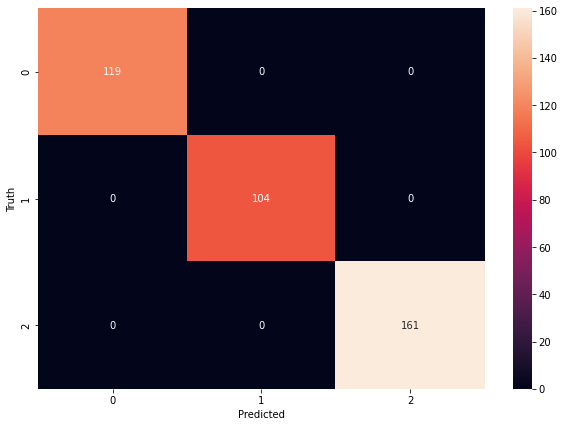

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.83      0.72        23
           1       0.95      0.83      0.88        23
           2       0.83      0.76      0.79        50

    accuracy                           0.79        96
   macro avg       0.80      0.80      0.80        96
weighted avg       0.81      0.79      0.80        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-Adam-relu-3hidden layers-80

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 37ms/step - loss: 1.0882 - accuracy: 0.3880 - val_loss: 0.9455 - val_accuracy: 0.5417
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8609 - accuracy: 0.5677 - val_loss: 0.7374 - val_accuracy: 0.5833
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7835 - accuracy: 0.6016 - val_loss: 0.6379 - val_accuracy: 0.7500
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6990 - accuracy: 0.6562 - val_loss: 0.6354 - val_accuracy: 0.6562
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6337 - accuracy: 0.7135 - val_loss: 0.6996 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6291 - accuracy: 0.7109 - val_loss: 0.5595 - val_accuracy: 0.7604
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6226 - accuracy: 0.7240 - val_loss: 0.6258 - val_accuracy: 0.6771
Epoch 8/100


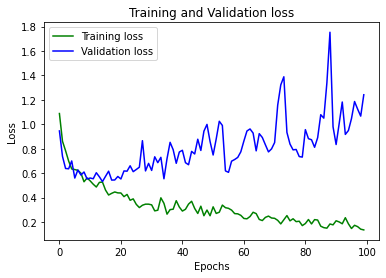

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-Adam-relu-4hidden layers-73

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(40, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(40, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(40, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(40, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 1.0584 - accuracy: 0.4219 - val_loss: 0.8704 - val_accuracy: 0.5625
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8068 - accuracy: 0.5911 - val_loss: 0.6642 - val_accuracy: 0.6667
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7926 - accuracy: 0.5781 - val_loss: 0.7322 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6969 - accuracy: 0.6797 - val_loss: 0.6374 - val_accuracy: 0.6562
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6593 - accuracy: 0.6901 - val_loss: 0.6072 - val_accuracy: 0.7500
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6969 - accuracy: 0.6771 - val_loss: 0.7431 - val_accuracy: 0.6562
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6598 - accuracy: 0.6927 - val_loss: 0.5571 - val_accuracy: 0.7292
Epoch 8/100


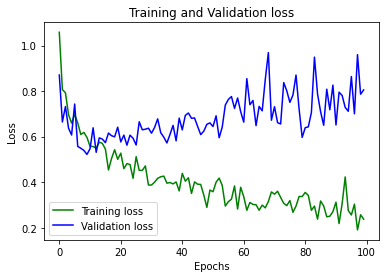

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

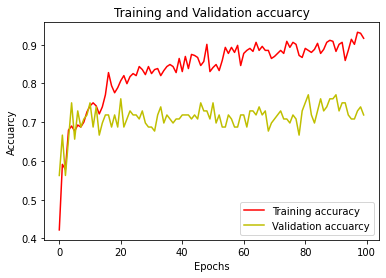

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       119
           1       0.97      1.00      0.99       104
           2       0.99      0.94      0.97       161

    accuracy                           0.97       384
   macro avg       0.97      0.98      0.97       384
weighted avg       0.97      0.97      0.97       384



Text(69.0, 0.5, 'Truth')

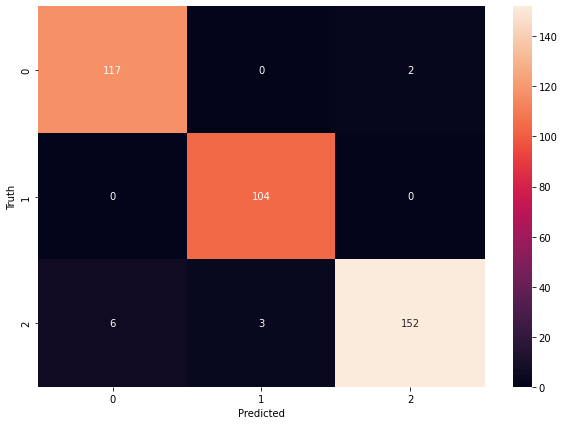

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.70      0.60        23
           1       0.90      0.83      0.86        23
           2       0.76      0.68      0.72        50

    accuracy                           0.72        96
   macro avg       0.73      0.73      0.73        96
weighted avg       0.74      0.72      0.72        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-Adam-relu-5hidden layers-76

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 1.1068 - accuracy: 0.3516 - val_loss: 1.0697 - val_accuracy: 0.5104
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0941 - accuracy: 0.3359 - val_loss: 1.0500 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 1.0693 - accuracy: 0.3776 - val_loss: 1.0340 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0448 - accuracy: 0.4401 - val_loss: 1.0116 - val_accuracy: 0.5312
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0282 - accuracy: 0.4401 - val_loss: 0.9821 - val_accuracy: 0.5417
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9985 - accuracy: 0.4505 - val_loss: 0.9524 - val_accuracy: 0.4062
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9968 - accuracy: 0.4271 - val_loss: 0.9297 - val_accuracy: 0.4271
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       119
           1       0.97      1.00      0.99       104
           2       0.85      0.80      0.82       161

    accuracy                           0.86       384
   macro avg       0.86      0.87      0.87       384
weighted avg       0.86      0.86      0.86       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-Adam-relu 3 hidden layers-74

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-ADAM-relu-4hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-ADAM-relu-5 hidden layers-75

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 3s 43ms/step - loss: 1.2961 - accuracy: 0.3411 - val_loss: 1.0796 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 1.1325 - accuracy: 0.3932 - val_loss: 1.0560 - val_accuracy: 0.5417
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 1.0509 - accuracy: 0.4609 - val_loss: 1.0274 - val_accuracy: 0.6562
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 0.9116 - accuracy: 0.5417 - val_loss: 1.0011 - val_accuracy: 0.6667
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.8344 - accuracy: 0.6276 - val_loss: 0.9704 - val_accuracy: 0.6771
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 0.8174 - accuracy: 0.6250 - val_loss: 0.9394 - val_accuracy: 0.6771
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7868 - accuracy: 0.6224 - val_loss: 0.9134 - val_accuracy: 0.6979
Epoch 8

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

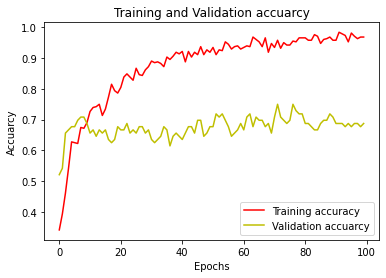

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       1.00      1.00      1.00       104
           2       0.99      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

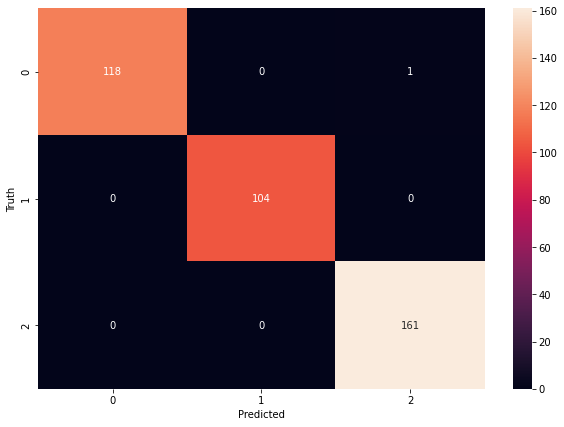

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.70      0.56        23
           1       0.90      0.83      0.86        23
           2       0.76      0.62      0.68        50

    accuracy                           0.69        96
   macro avg       0.71      0.71      0.70        96
weighted avg       0.72      0.69      0.70        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-tanh-3hidden layers-75

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 26ms/step - loss: 1.1668 - accuracy: 0.3281 - val_loss: 0.9587 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8743 - accuracy: 0.5833 - val_loss: 0.8382 - val_accuracy: 0.5625
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7639 - accuracy: 0.6432 - val_loss: 0.7964 - val_accuracy: 0.5938
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7069 - accuracy: 0.6745 - val_loss: 0.7575 - val_accuracy: 0.6146
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6658 - accuracy: 0.7109 - val_loss: 0.7266 - val_accuracy: 0.6562
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6322 - accuracy: 0.7318 - val_loss: 0.6972 - val_accuracy: 0.6562
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6039 - accuracy: 0.7448 - val_loss: 0.6664 - val_accuracy: 0.6771
Epoch 8/100


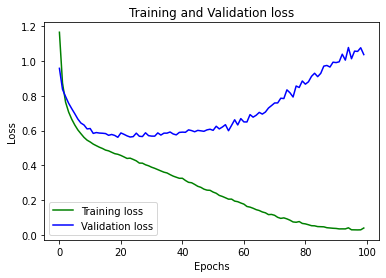

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

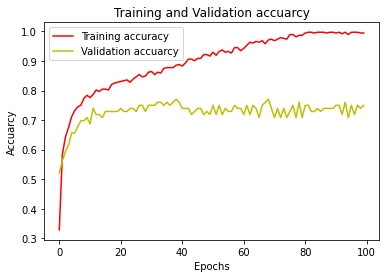

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       119
           1       1.00      1.00      1.00       104
           2       0.99      1.00      0.99       161

    accuracy                           0.99       384
   macro avg       1.00      0.99      1.00       384
weighted avg       0.99      0.99      0.99       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.78      0.65        23
           1       1.00      0.78      0.88        23
           2       0.78      0.72      0.75        50

    accuracy                           0.75        96
   macro avg       0.78      0.76      0.76        96
weighted avg       0.78      0.75      0.76        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-tanh-4hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(30, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(10, activation='tanh'),
   keras.layers.Dense(10, activation='tanh'),
   keras.layers.Dense(10, activation='tanh'),
   keras.layers.Dense(10, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 1.0910 - accuracy: 0.4062 - val_loss: 1.0301 - val_accuracy: 0.4896
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9947 - accuracy: 0.5208 - val_loss: 0.9512 - val_accuracy: 0.5833
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9051 - accuracy: 0.6250 - val_loss: 0.8643 - val_accuracy: 0.6250
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8205 - accuracy: 0.6849 - val_loss: 0.7918 - val_accuracy: 0.6667
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7526 - accuracy: 0.7005 - val_loss: 0.7380 - val_accuracy: 0.6875
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7060 - accuracy: 0.7188 - val_loss: 0.7030 - val_accuracy: 0.6354
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6716 - accuracy: 0.7344 - val_loss: 0.6730 - val_accuracy: 0.6562
Epoch 8/100


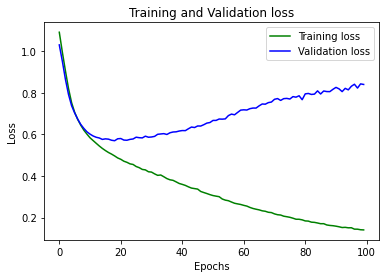

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

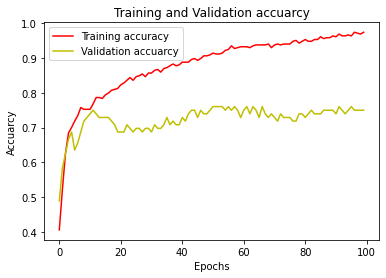

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       119
           1       0.99      0.99      0.99       104
           2       0.99      0.95      0.97       161

    accuracy                           0.97       384
   macro avg       0.97      0.98      0.98       384
weighted avg       0.97      0.97      0.97       384



Text(69.0, 0.5, 'Truth')

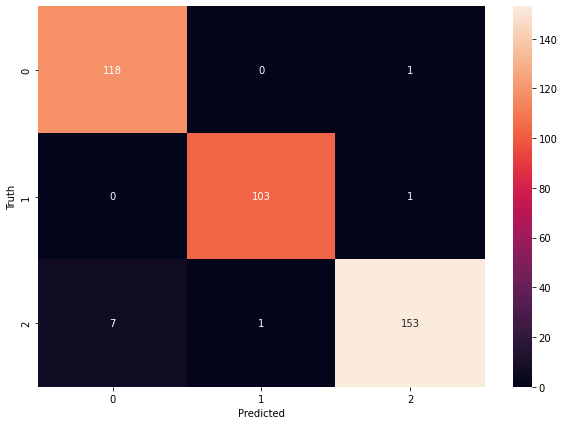

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.86      0.78      0.82        23
           2       0.77      0.74      0.76        50

    accuracy                           0.75        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.76      0.75      0.75        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-tanh-5hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 28ms/step - loss: 0.9523 - accuracy: 0.5495 - val_loss: 1.0074 - val_accuracy: 0.4271
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8021 - accuracy: 0.6562 - val_loss: 0.9068 - val_accuracy: 0.4792
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7099 - accuracy: 0.6849 - val_loss: 0.8056 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6500 - accuracy: 0.7214 - val_loss: 0.7388 - val_accuracy: 0.6042
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6102 - accuracy: 0.7474 - val_loss: 0.7136 - val_accuracy: 0.6354
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.5779 - accuracy: 0.7656 - val_loss: 0.6788 - val_accuracy: 0.6458
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5578 - accuracy: 0.7786 - val_loss: 0.6707 - val_accuracy: 0.6771
Epoch 8/100


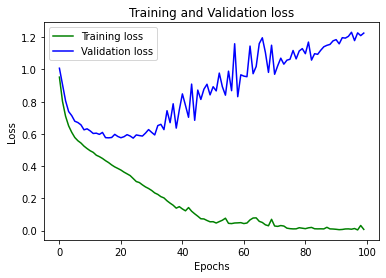

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

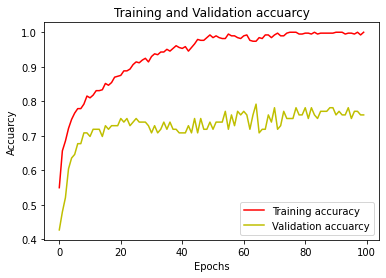

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

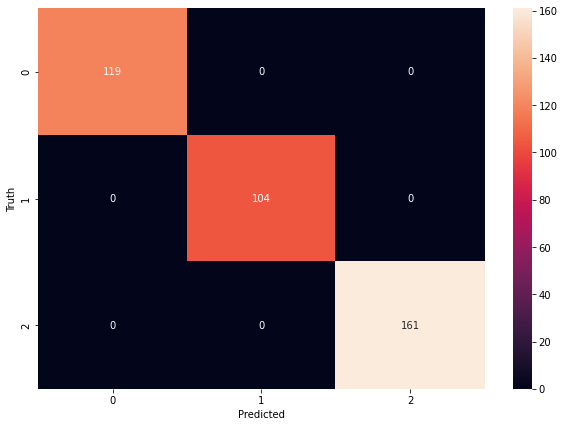

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.83      0.68        23
           1       0.88      0.91      0.89        23
           2       0.85      0.66      0.74        50

    accuracy                           0.76        96
   macro avg       0.77      0.80      0.77        96
weighted avg       0.79      0.76      0.76        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-ADAM-tanh-3 hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 30ms/step - loss: 1.1798 - accuracy: 0.3672 - val_loss: 1.0008 - val_accuracy: 0.5312
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 1.0509 - accuracy: 0.4583 - val_loss: 0.8906 - val_accuracy: 0.5521
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9367 - accuracy: 0.5755 - val_loss: 0.8318 - val_accuracy: 0.6250
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8658 - accuracy: 0.5625 - val_loss: 0.7853 - val_accuracy: 0.5833
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7975 - accuracy: 0.6094 - val_loss: 0.7487 - val_accuracy: 0.5729
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7786 - accuracy: 0.6302 - val_loss: 0.7302 - val_accuracy: 0.5625
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7265 - accuracy: 0.6641 - val_loss: 0.7074 - val_accuracy: 0.5729
Epoch 8/100


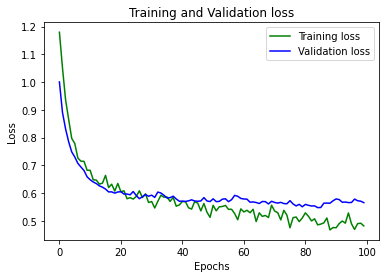

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

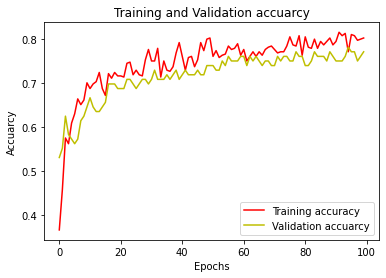

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       119
           1       0.91      0.93      0.92       104
           2       0.86      0.76      0.81       161

    accuracy                           0.85       384
   macro avg       0.85      0.86      0.86       384
weighted avg       0.85      0.85      0.85       384



Text(69.0, 0.5, 'Truth')

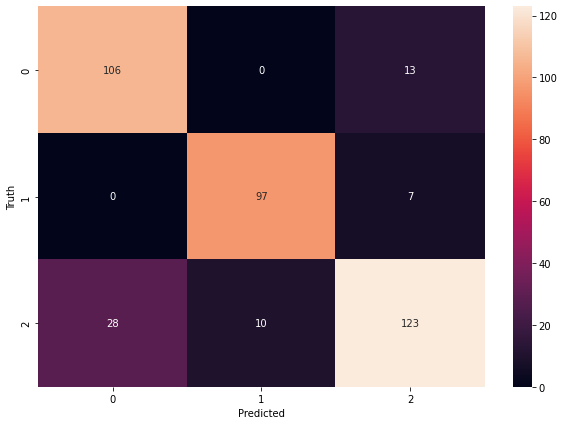

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65        23
           1       0.91      0.91      0.91        23
           2       0.82      0.72      0.77        50

    accuracy                           0.77        96
   macro avg       0.77      0.79      0.78        96
weighted avg       0.79      0.77      0.77        96



Text(69.0, 0.5, 'Truth')

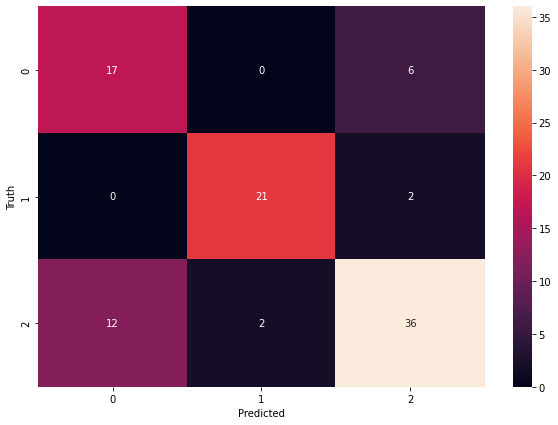

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## RECALL

In [ ]:
Actual_zero = (cm[0][0]+cm[0][1]+cm[0][2]).numpy()
zero_recall = round(((cm[0][0]).numpy()/Actual_zero)*100)
print("Zero Recall: "+ str(zero_recall)+"%")
Actual_one = (cm[1][0]+cm[1][1]+cm[1][2]).numpy()
one_recall = round(((cm[1][1]).numpy()/Actual_one)*100)
print("One Recall: "+ str(one_recall)+"%")
Actual_two = (cm[2][0]+cm[2][1]+cm[2][2]).numpy()
two_recall = round(((cm[2][2]).numpy()/Actual_two)*100)
print("Two Recall: "+ str(two_recall)+"%")

Zero Recall: 74%
One Recall: 91%
Two Recall: 72%


## PRECISION

In [ ]:
Pred_zero = (cm[0][0]+cm[1][0]+cm[2][0]).numpy()
zero_precision = round(((cm[0][0]).numpy()/Pred_zero)*100)
print("Zero Precision: "+ str(zero_precision)+"%")
Pred_one = (cm[0][1]+cm[1][1]+cm[2][1]).numpy()
one_precision = round(((cm[1][1]).numpy()/Pred_one)*100)
print("One Precision: "+ str(one_precision)+"%")
Pred_Two= (cm[0][2]+cm[1][2]+cm[2][2]).numpy()
Two_precision = round(((cm[2][2]).numpy()/Pred_Two)*100)
print("Two Precision: "+ str(Two_precision)+"%")

Zero Precision: 59%
One Precision: 91%
Two Precision: 82%


## F1-SCORE

In [ ]:
zero_f1_score = round(2 * (zero_precision*zero_recall)/(zero_precision+zero_recall))
print("Zero F1-Score: "+ str(zero_f1_score)+"%")
one_f1_score = round(2 * (one_precision*one_recall)/(one_precision+one_recall))
print("One F1-Score: "+ str(one_f1_score)+"%")
two_f1_score = round(2 * (Two_precision*two_recall)/(Two_precision+two_recall))
print("Two F1-Score: "+ str(two_f1_score)+"%")

Zero F1-Score: 66%
One F1-Score: 91%
Two F1-Score: 77%


## Macro Recall

In [ ]:
Macro_Recall = round((zero_recall + one_recall + two_recall)/3)
print("Macro-Recall: " + str(Macro_Recall)+"%")

Macro-Recall: 79%


## Macro Precision

In [ ]:
Macro_precision = round((zero_precision + one_precision + Two_precision)/3)
print("Macro-Precision: " + str(Macro_precision)+"%")

Macro-Precision: 77%


## Macro-F1

In [ ]:
Macro_F1 = round((zero_f1_score + one_f1_score + two_f1_score)/3)
print("Macro-F1: " + str(Macro_F1)+"%")

Macro-F1: 78%


# Dropout-Adam-tanh-4 hidden layers-74

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 1.1006 - accuracy: 0.3646 - val_loss: 0.9468 - val_accuracy: 0.4896
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9567 - accuracy: 0.5234 - val_loss: 0.8360 - val_accuracy: 0.6146
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9015 - accuracy: 0.5547 - val_loss: 0.7661 - val_accuracy: 0.6146
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.8137 - accuracy: 0.5807 - val_loss: 0.7392 - val_accuracy: 0.5729
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7631 - accuracy: 0.6146 - val_loss: 0.7184 - val_accuracy: 0.5729
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7346 - accuracy: 0.6302 - val_loss: 0.7014 - val_accuracy: 0.5833
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7438 - accuracy: 0.6510 - val_loss: 0.6802 - val_accuracy: 0.6042
Epoch 8/100


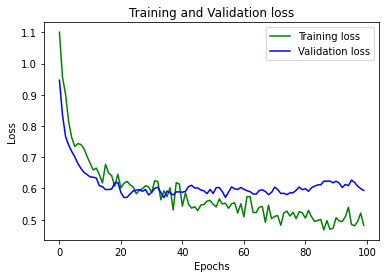

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

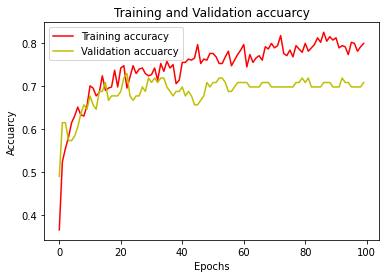

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       119
           1       0.91      0.93      0.92       104
           2       0.86      0.78      0.81       161

    accuracy                           0.85       384
   macro avg       0.85      0.86      0.86       384
weighted avg       0.85      0.85      0.85       384



Text(69.0, 0.5, 'Truth')

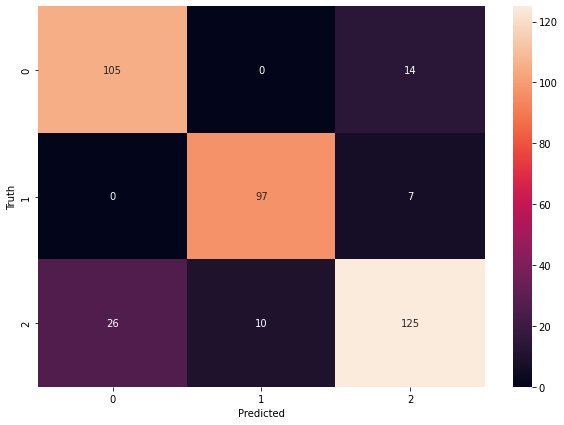

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.70      0.59        23
           1       0.87      0.87      0.87        23
           2       0.76      0.64      0.70        50

    accuracy                           0.71        96
   macro avg       0.72      0.74      0.72        96
weighted avg       0.73      0.71      0.71        96



Text(69.0, 0.5, 'Truth')

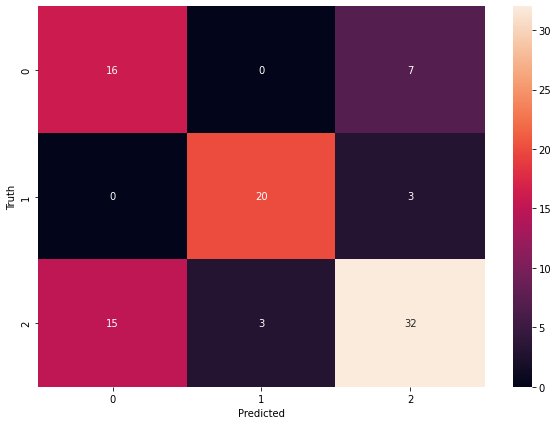

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-Adam-tanh-5 hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 29ms/step - loss: 1.0501 - accuracy: 0.4583 - val_loss: 0.8894 - val_accuracy: 0.5938
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9227 - accuracy: 0.5443 - val_loss: 0.7914 - val_accuracy: 0.5938
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.8444 - accuracy: 0.5755 - val_loss: 0.7553 - val_accuracy: 0.5521
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7577 - accuracy: 0.6276 - val_loss: 0.7396 - val_accuracy: 0.5521
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.7380 - accuracy: 0.6484 - val_loss: 0.6988 - val_accuracy: 0.6146
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.7277 - accuracy: 0.6432 - val_loss: 0.6642 - val_accuracy: 0.6458
Epoch 7/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7181 - accuracy: 0.6562 - val_loss: 0.6665 - val_accuracy: 0.6458
Epoch 8/100

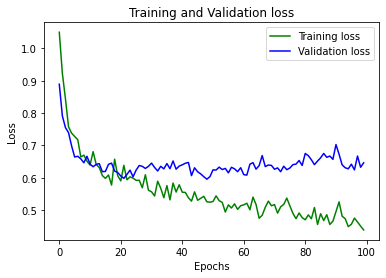

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

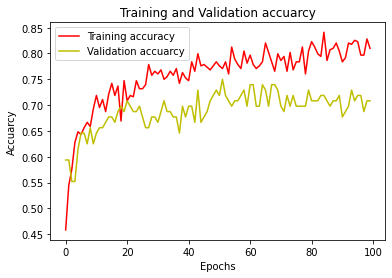

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       119
           1       0.89      0.95      0.92       104
           2       0.90      0.78      0.83       161

    accuracy                           0.87       384
   macro avg       0.87      0.88      0.87       384
weighted avg       0.87      0.87      0.87       384



Text(69.0, 0.5, 'Truth')

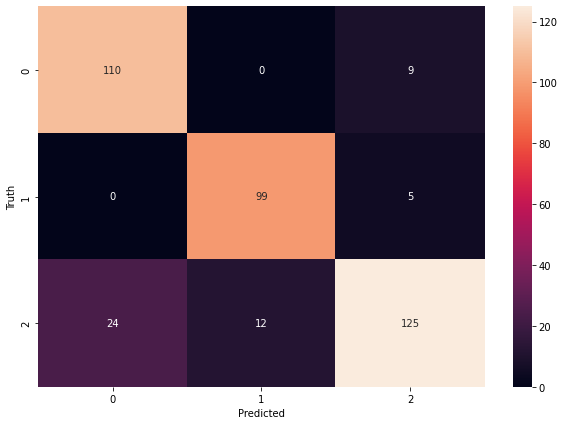

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.70      0.59        23
           1       0.84      0.91      0.87        23
           2       0.78      0.62      0.69        50

    accuracy                           0.71        96
   macro avg       0.71      0.74      0.72        96
weighted avg       0.73      0.71      0.71        96



Text(69.0, 0.5, 'Truth')

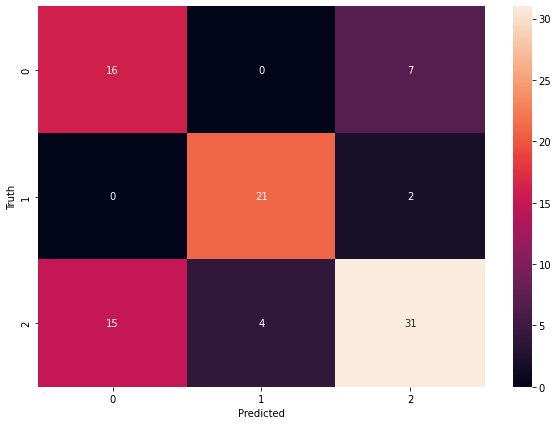

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-Adam-tanh-3 hidden layers-77

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 23ms/step - loss: 1.2593 - accuracy: 0.4297 - val_loss: 0.9762 - val_accuracy: 0.5104
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8489 - accuracy: 0.5729 - val_loss: 0.8920 - val_accuracy: 0.5312
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7771 - accuracy: 0.6328 - val_loss: 0.8444 - val_accuracy: 0.5312
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7485 - accuracy: 0.6302 - val_loss: 0.8141 - val_accuracy: 0.5833
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.6901 - val_loss: 0.7892 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.7057 - val_loss: 0.7759 - val_accuracy: 0.6562
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6341 - accuracy: 0.7292 - val_loss: 0.7561 - val_accuracy: 0.7188
Epoch 8/100


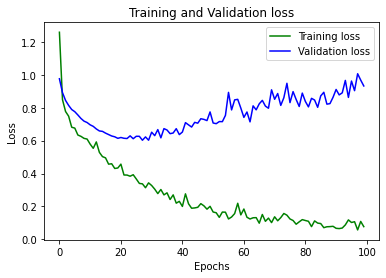

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

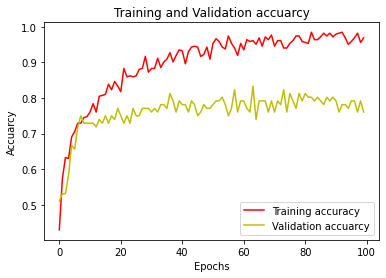

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

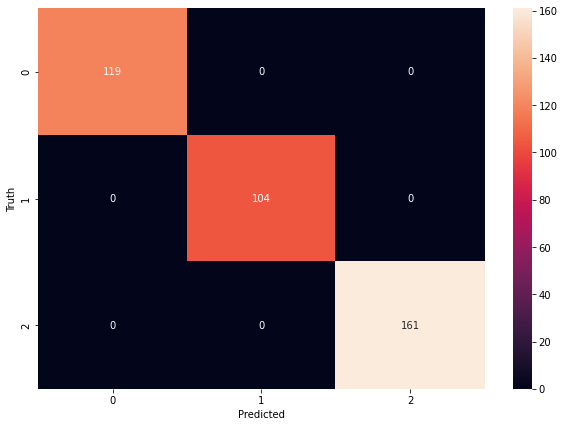

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.90      0.78      0.84        23
           2       0.78      0.76      0.77        50

    accuracy                           0.76        96
   macro avg       0.77      0.76      0.76        96
weighted avg       0.77      0.76      0.76        96



Text(69.0, 0.5, 'Truth')

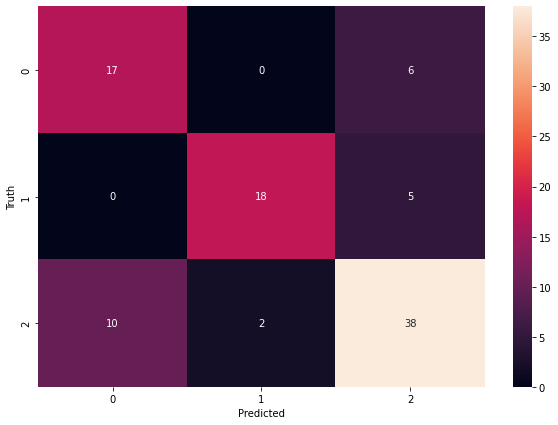

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-ADAM-tanh-4 hidden layers-75

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 25ms/step - loss: 1.2420 - accuracy: 0.4141 - val_loss: 0.9960 - val_accuracy: 0.5312
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8550 - accuracy: 0.5938 - val_loss: 0.9118 - val_accuracy: 0.5833
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7732 - accuracy: 0.6615 - val_loss: 0.8576 - val_accuracy: 0.6146
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7323 - accuracy: 0.6589 - val_loss: 0.8281 - val_accuracy: 0.6250
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.7188 - val_loss: 0.7970 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6531 - accuracy: 0.7188 - val_loss: 0.7635 - val_accuracy: 0.6667
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6496 - accuracy: 0.7500 - val_loss: 0.7421 - val_accuracy: 0.6771
Epoch 8/100


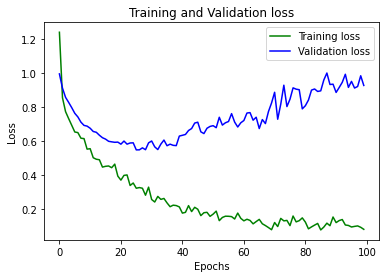

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

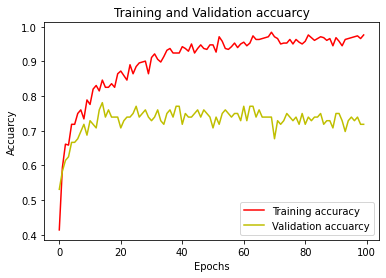

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       0.99      1.00      1.00       104
           2       1.00      0.99      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

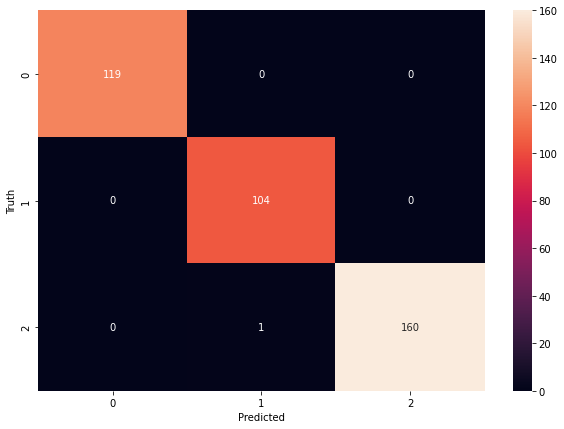

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.77      0.74      0.76        23
           2       0.75      0.72      0.73        50

    accuracy                           0.72        96
   macro avg       0.71      0.72      0.71        96
weighted avg       0.72      0.72      0.72        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Batch-Adam-tanh-5 hidden layers-79

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 30ms/step - loss: 1.1452 - accuracy: 0.4219 - val_loss: 0.9919 - val_accuracy: 0.5312
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8295 - accuracy: 0.6016 - val_loss: 0.9409 - val_accuracy: 0.5417
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7646 - accuracy: 0.6432 - val_loss: 0.9163 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7099 - accuracy: 0.6771 - val_loss: 0.8938 - val_accuracy: 0.5625
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7023 - accuracy: 0.6667 - val_loss: 0.8607 - val_accuracy: 0.6250
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6694 - accuracy: 0.6823 - val_loss: 0.8240 - val_accuracy: 0.6250
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6061 - accuracy: 0.7604 - val_loss: 0.8155 - val_accuracy: 0.6458
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      0.99      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.65      0.56        23
           1       0.83      0.83      0.83        23
           2       0.71      0.60      0.65        50

    accuracy                           0.67        96
   macro avg       0.67      0.69      0.68        96
weighted avg       0.69      0.67      0.67        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Adam-sigmoid-3hidden layers-76

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(30, activation='sigmoid'),
   keras.layers.Dense(30, activation='sigmoid'),
   keras.layers.Dense(30, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1.2009 - accuracy: 0.3880 - val_loss: 1.0386 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1098 - accuracy: 0.3542 - val_loss: 1.0326 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9760 - accuracy: 0.4505 - val_loss: 0.8268 - val_accuracy: 0.6667
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7821 - accuracy: 0.6016 - val_loss: 0.7637 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.5677 - val_loss: 0.6984 - val_accuracy: 0.6771
Epoch 6/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6573 - accuracy: 0.6589 - val_loss: 0.7092 - val_accuracy: 0.5417
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6406 - val_loss: 0.6681 - val_accuracy: 0.6562
Epoch 8/100


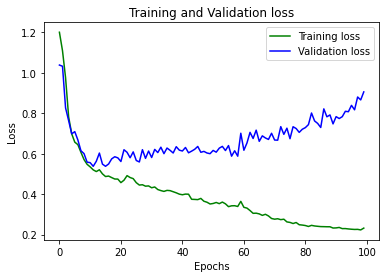

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

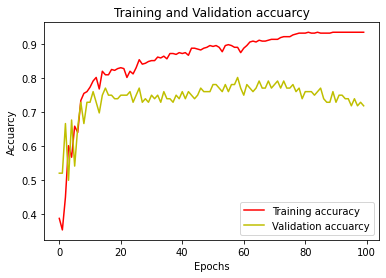

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       119
           1       0.91      0.97      0.94       104
           2       0.98      0.86      0.92       161

    accuracy                           0.93       384
   macro avg       0.93      0.94      0.94       384
weighted avg       0.94      0.93      0.93       384



Text(69.0, 0.5, 'Truth')

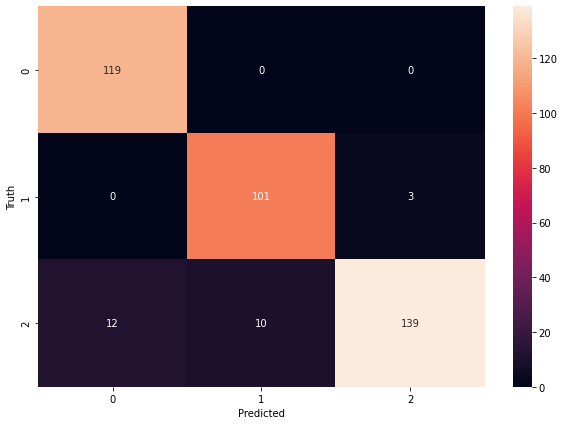

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.78      0.64        23
           1       0.86      0.83      0.84        23
           2       0.78      0.64      0.70        50

    accuracy                           0.72        96
   macro avg       0.73      0.75      0.73        96
weighted avg       0.74      0.72      0.72        96



Text(69.0, 0.5, 'Truth')

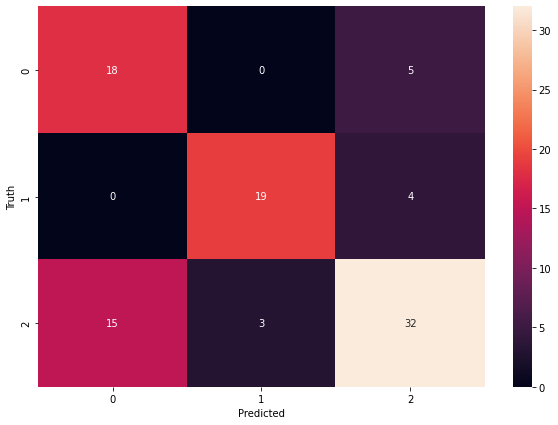

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adam-sigmoid-4hidden layers-75

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1050 - accuracy: 0.3698 - val_loss: 1.0839 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0801 - accuracy: 0.4193 - val_loss: 1.0177 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0392 - accuracy: 0.4193 - val_loss: 0.9553 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8834 - accuracy: 0.5417 - val_loss: 0.7866 - val_accuracy: 0.5521
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7396 - accuracy: 0.5573 - val_loss: 0.7255 - val_accuracy: 0.6875
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6819 - accuracy: 0.6042 - val_loss: 0.7417 - val_accuracy: 0.6979
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.6042 - val_loss: 0.6970 - val_accuracy: 0.6771
Epoch 8/100


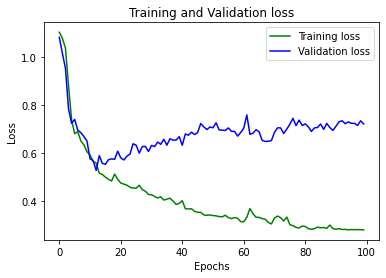

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

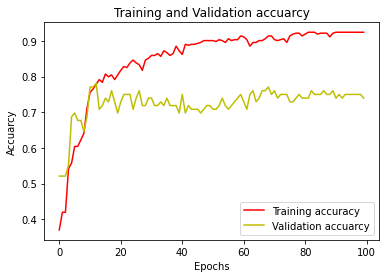

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       119
           1       0.91      0.97      0.94       104
           2       0.95      0.87      0.91       161

    accuracy                           0.92       384
   macro avg       0.92      0.93      0.93       384
weighted avg       0.93      0.92      0.92       384



Text(69.0, 0.5, 'Truth')

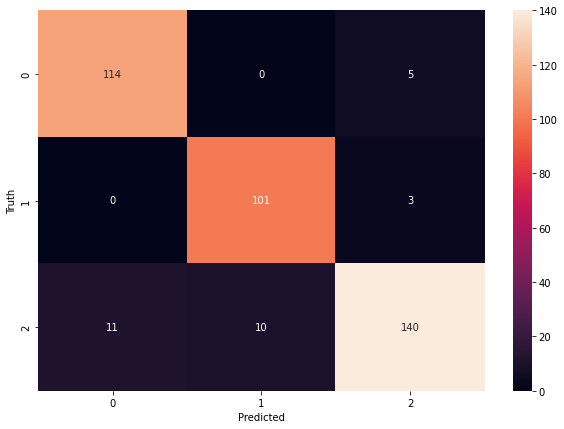

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65        23
           1       0.86      0.83      0.84        23
           2       0.78      0.70      0.74        50

    accuracy                           0.74        96
   macro avg       0.74      0.76      0.75        96
weighted avg       0.75      0.74      0.74        96



Text(69.0, 0.5, 'Truth')

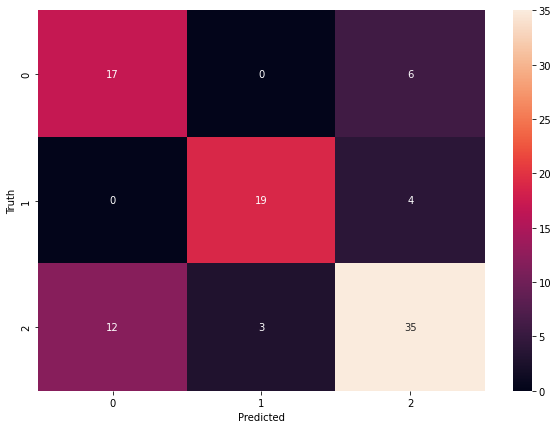

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adam-sigmoid-5hidden layers-77

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.1278 - accuracy: 0.3620 - val_loss: 1.0353 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.4193 - val_loss: 1.0814 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0842 - accuracy: 0.3698 - val_loss: 1.0286 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0281 - accuracy: 0.4193 - val_loss: 0.9336 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8971 - accuracy: 0.5286 - val_loss: 0.8565 - val_accuracy: 0.5000
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7784 - accuracy: 0.5911 - val_loss: 0.7395 - val_accuracy: 0.6562
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7496 - accuracy: 0.5807 - val_loss: 0.7310 - val_accuracy: 0.5417
Epoch 8/100


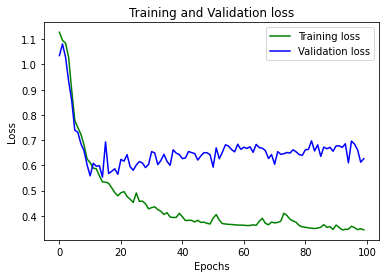

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

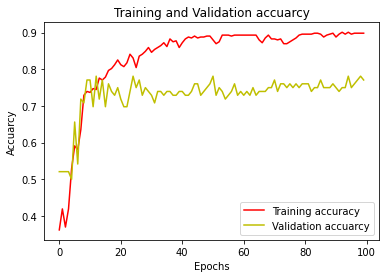

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       119
           1       0.91      0.97      0.94       104
           2       0.92      0.84      0.88       161

    accuracy                           0.90       384
   macro avg       0.90      0.91      0.91       384
weighted avg       0.90      0.90      0.90       384



Text(69.0, 0.5, 'Truth')

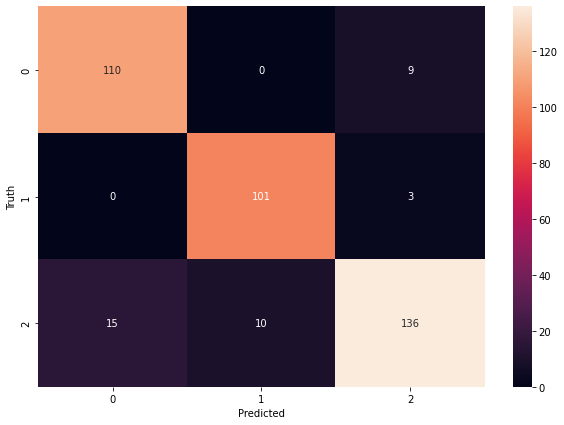

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.78      0.71        23
           1       0.86      0.83      0.84        23
           2       0.80      0.74      0.77        50

    accuracy                           0.77        96
   macro avg       0.77      0.78      0.77        96
weighted avg       0.78      0.77      0.77        96



Text(69.0, 0.5, 'Truth')

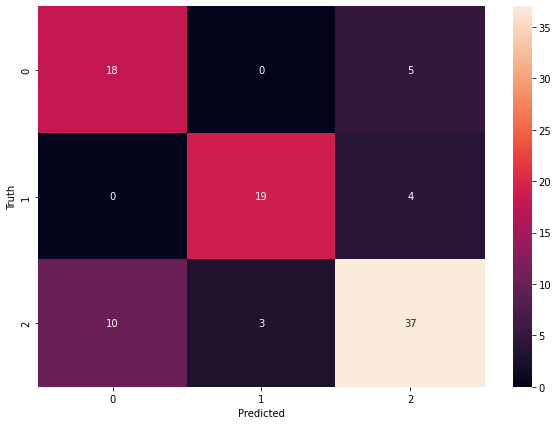

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-Adam-sigmoid-3hidden layers-77

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.5341 - accuracy: 0.2682 - val_loss: 1.5174 - val_accuracy: 0.2396
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.3671 - accuracy: 0.2969 - val_loss: 1.3487 - val_accuracy: 0.2396
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.2528 - accuracy: 0.2943 - val_loss: 1.2324 - val_accuracy: 0.2396
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.2196 - accuracy: 0.2812 - val_loss: 1.1467 - val_accuracy: 0.2396
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1567 - accuracy: 0.3229 - val_loss: 1.0958 - val_accuracy: 0.4479
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1583 - accuracy: 0.2917 - val_loss: 1.0685 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1177 - accuracy: 0.3646 - val_loss: 1.0537 - val_accuracy: 0.5208
Epoch 8/100


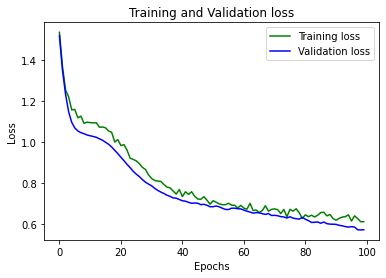

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       119
           1       0.85      0.95      0.90       104
           2       0.81      0.63      0.71       161

    accuracy                           0.78       384
   macro avg       0.79      0.81      0.79       384
weighted avg       0.79      0.78      0.78       384



Text(69.0, 0.5, 'Truth')

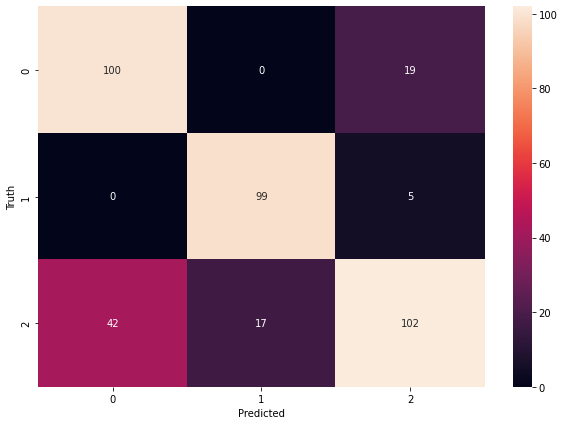

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.83      0.64        23
           1       0.87      0.87      0.87        23
           2       0.81      0.60      0.69        50

    accuracy                           0.72        96
   macro avg       0.74      0.77      0.73        96
weighted avg       0.76      0.72      0.72        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-Adam-sigmoid-4hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(40, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1623 - accuracy: 0.3333 - val_loss: 1.0763 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1056 - accuracy: 0.3698 - val_loss: 1.0412 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0919 - accuracy: 0.4375 - val_loss: 1.0403 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1003 - accuracy: 0.3750 - val_loss: 1.0634 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0755 - accuracy: 0.4245 - val_loss: 1.0177 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0414 - accuracy: 0.4557 - val_loss: 1.0038 - val_accuracy: 0.5312
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9743 - accuracy: 0.4844 - val_loss: 0.9165 - val_accuracy: 0.4479
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

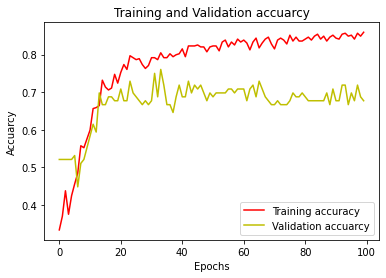

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.94      0.85       119
           1       0.90      0.97      0.94       104
           2       0.92      0.74      0.82       161

    accuracy                           0.86       384
   macro avg       0.87      0.88      0.87       384
weighted avg       0.87      0.86      0.86       384



Text(69.0, 0.5, 'Truth')

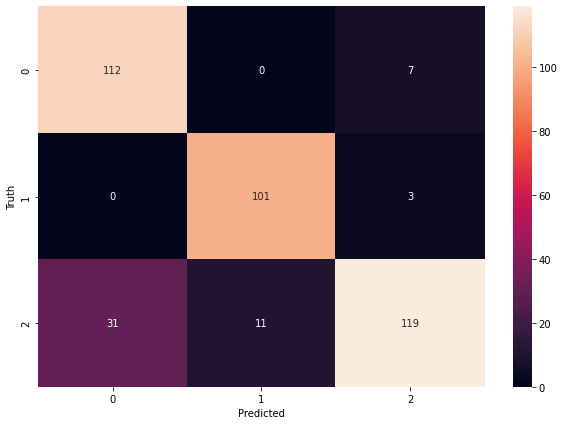

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.74      0.59        23
           1       0.90      0.78      0.84        23
           2       0.73      0.60      0.66        50

    accuracy                           0.68        96
   macro avg       0.71      0.71      0.69        96
weighted avg       0.71      0.68      0.68        96



Text(69.0, 0.5, 'Truth')

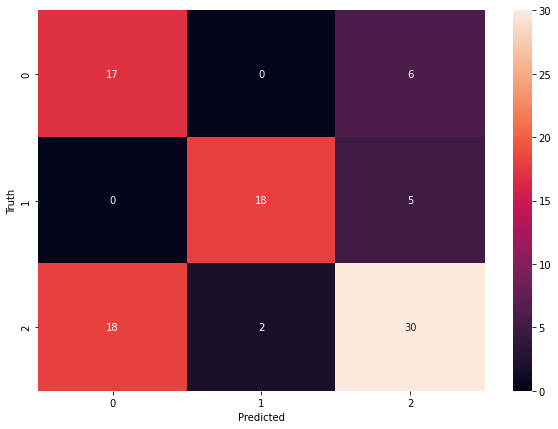

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-Adam-sigmoid-5hidden layers-69

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(40, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.1070 - accuracy: 0.3880 - val_loss: 1.0646 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1115 - accuracy: 0.3854 - val_loss: 1.0374 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0941 - accuracy: 0.3542 - val_loss: 1.0658 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0932 - accuracy: 0.4062 - val_loss: 1.0301 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0715 - accuracy: 0.4167 - val_loss: 1.0160 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0274 - accuracy: 0.4297 - val_loss: 0.9340 - val_accuracy: 0.6562
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9045 - accuracy: 0.5495 - val_loss: 0.8238 - val_accuracy: 0.4896
Epoch 8/100


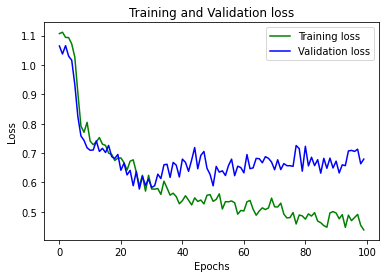

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

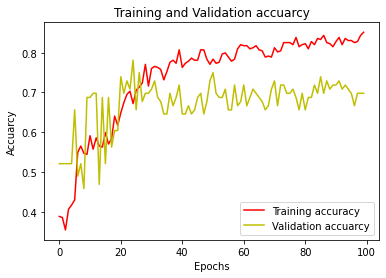

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       119
           1       0.89      0.97      0.93       104
           2       0.92      0.76      0.83       161

    accuracy                           0.87       384
   macro avg       0.87      0.89      0.87       384
weighted avg       0.88      0.87      0.87       384



Text(69.0, 0.5, 'Truth')

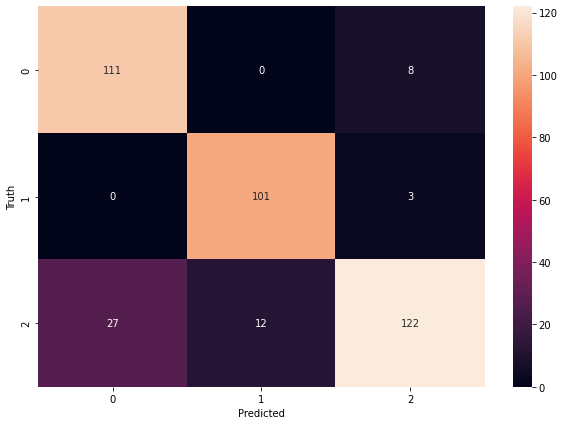

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.78      0.62        23
           1       0.86      0.83      0.84        23
           2       0.77      0.60      0.67        50

    accuracy                           0.70        96
   macro avg       0.72      0.74      0.71        96
weighted avg       0.73      0.70      0.70        96



Text(69.0, 0.5, 'Truth')

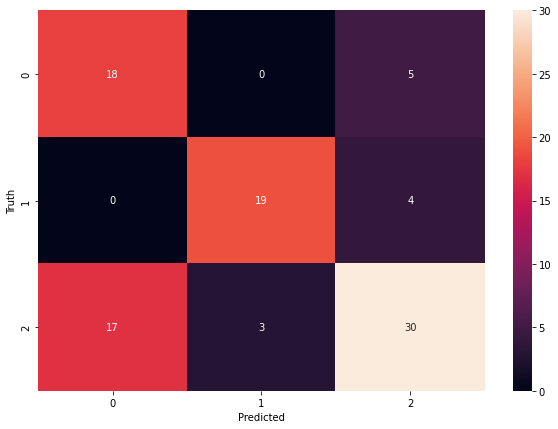

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-Adam-sigmoid-3hidden layers-64

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.4772 - accuracy: 0.2995 - val_loss: 1.1359 - val_accuracy: 0.2396
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0028 - accuracy: 0.5026 - val_loss: 1.1263 - val_accuracy: 0.2396
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8457 - accuracy: 0.6250 - val_loss: 1.1154 - val_accuracy: 0.2396
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7620 - accuracy: 0.6667 - val_loss: 1.1020 - val_accuracy: 0.2396
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7098 - accuracy: 0.7031 - val_loss: 1.0853 - val_accuracy: 0.2396
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6721 - accuracy: 0.7292 - val_loss: 1.0696 - val_accuracy: 0.5938
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6524 - accuracy: 0.7266 - val_loss: 1.0529 - val_accuracy: 0.5208
Epoch 8/100


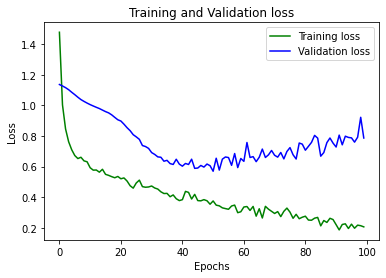

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

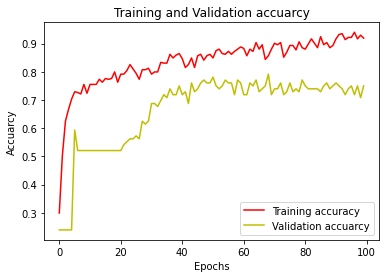

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       119
           1       0.99      0.97      0.98       104
           2       0.95      0.97      0.96       161

    accuracy                           0.97       384
   macro avg       0.97      0.97      0.97       384
weighted avg       0.97      0.97      0.97       384



Text(69.0, 0.5, 'Truth')

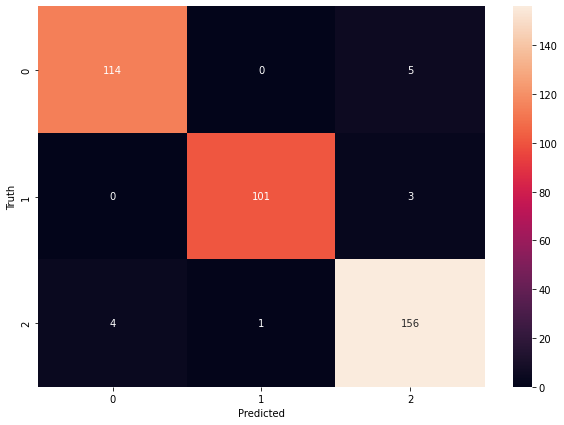

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.74      0.68        23
           1       0.83      0.83      0.83        23
           2       0.78      0.72      0.75        50

    accuracy                           0.75        96
   macro avg       0.75      0.76      0.75        96
weighted avg       0.76      0.75      0.75        96



Text(69.0, 0.5, 'Truth')

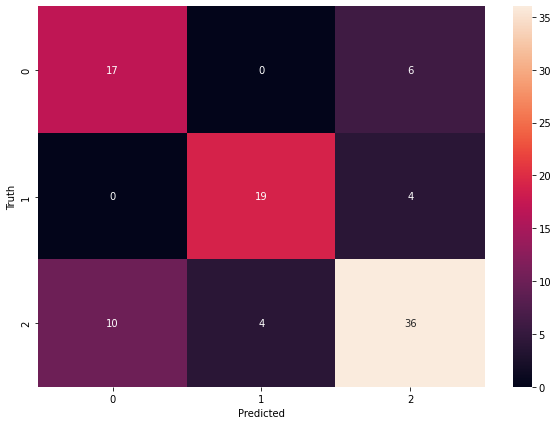

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-Adam-sigmoid-4hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 24ms/step - loss: 1.1220 - accuracy: 0.5443 - val_loss: 1.1172 - val_accuracy: 0.2396
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8091 - accuracy: 0.6068 - val_loss: 1.0965 - val_accuracy: 0.2396
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7607 - accuracy: 0.6250 - val_loss: 1.0778 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6961 - accuracy: 0.6771 - val_loss: 1.0588 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6891 - accuracy: 0.6719 - val_loss: 1.0447 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6781 - accuracy: 0.6901 - val_loss: 1.0337 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6306 - accuracy: 0.7135 - val_loss: 1.0260 - val_accuracy: 0.5208
Epoch 8/100


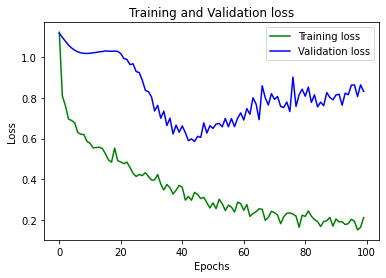

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

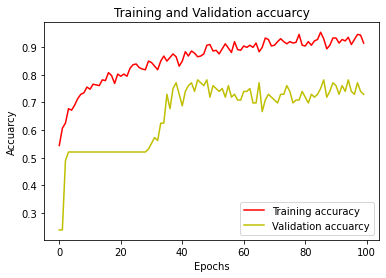

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       119
           1       0.98      1.00      0.99       104
           2       0.98      0.98      0.98       161

    accuracy                           0.98       384
   macro avg       0.98      0.99      0.98       384
weighted avg       0.98      0.98      0.98       384



Text(69.0, 0.5, 'Truth')

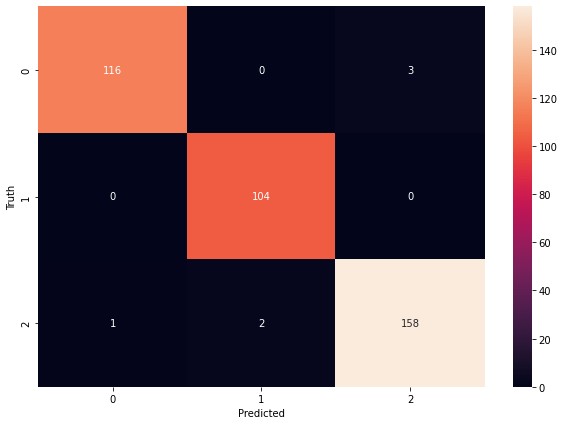

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.78      0.67        23
           1       0.80      0.87      0.83        23
           2       0.80      0.64      0.71        50

    accuracy                           0.73        96
   macro avg       0.73      0.76      0.74        96
weighted avg       0.75      0.73      0.73        96



Text(69.0, 0.5, 'Truth')

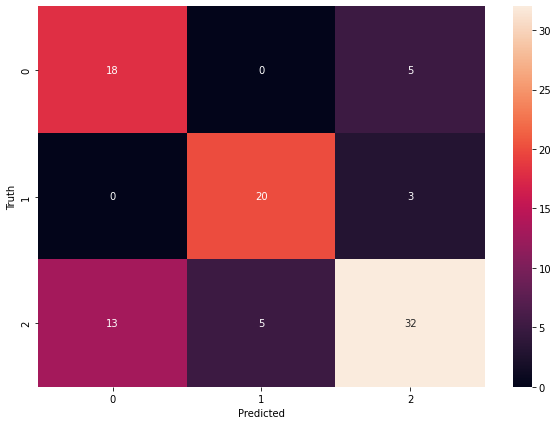

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-Adam-sigmoid-5hidden layers-74

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 28ms/step - loss: 1.1728 - accuracy: 0.4271 - val_loss: 1.0319 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.8529 - accuracy: 0.6224 - val_loss: 1.0308 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.7703 - accuracy: 0.6510 - val_loss: 1.0303 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7102 - accuracy: 0.6693 - val_loss: 1.0316 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.7083 - val_loss: 1.0337 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6690 - accuracy: 0.6979 - val_loss: 1.0379 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.7292 - val_loss: 1.0425 - val_accuracy: 0.5208
Epoch 8/100


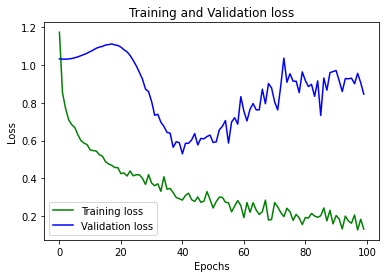

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

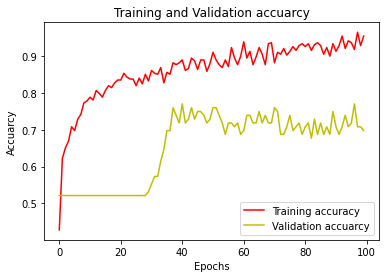

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.99      1.00       104
           2       0.99      0.99      0.99       161

    accuracy                           0.99       384
   macro avg       1.00      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



Text(69.0, 0.5, 'Truth')

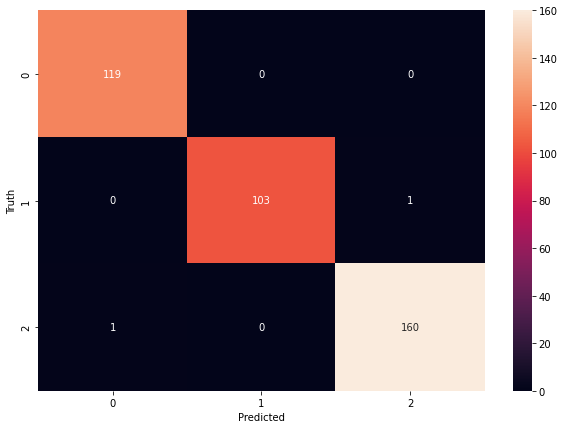

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.70      0.58        23
           1       0.82      0.78      0.80        23
           2       0.79      0.66      0.72        50

    accuracy                           0.70        96
   macro avg       0.70      0.71      0.70        96
weighted avg       0.73      0.70      0.70        96



Text(69.0, 0.5, 'Truth')

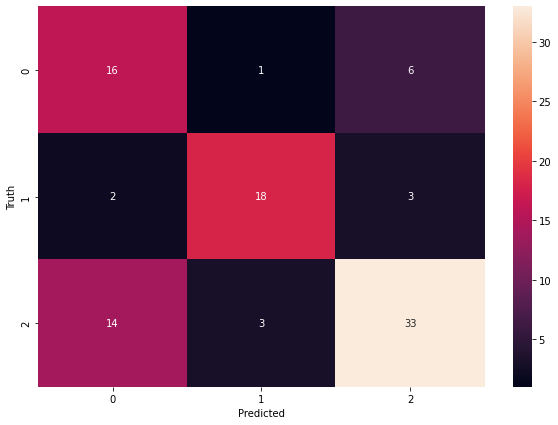

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-relu-3hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 1.2128 - accuracy: 0.3047 - val_loss: 1.1829 - val_accuracy: 0.2292
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1628 - accuracy: 0.2943 - val_loss: 1.1434 - val_accuracy: 0.2188
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1346 - accuracy: 0.2943 - val_loss: 1.1181 - val_accuracy: 0.2188
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1163 - accuracy: 0.2995 - val_loss: 1.0997 - val_accuracy: 0.2812
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1028 - accuracy: 0.3125 - val_loss: 1.0853 - val_accuracy: 0.3438
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0916 - accuracy: 0.3568 - val_loss: 1.0729 - val_accuracy: 0.3542
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0818 - accuracy: 0.3724 - val_loss: 1.0617 - val_accuracy: 0.3750
Epoch 8/100


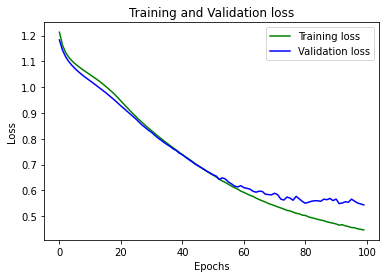

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

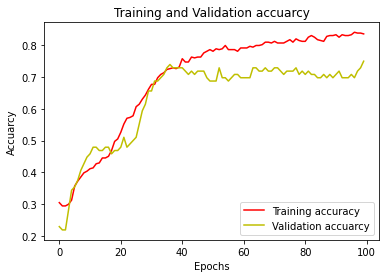

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       119
           1       0.88      0.91      0.90       104
           2       0.83      0.80      0.81       161

    accuracy                           0.84       384
   macro avg       0.84      0.85      0.85       384
weighted avg       0.84      0.84      0.84       384



Text(69.0, 0.5, 'Truth')

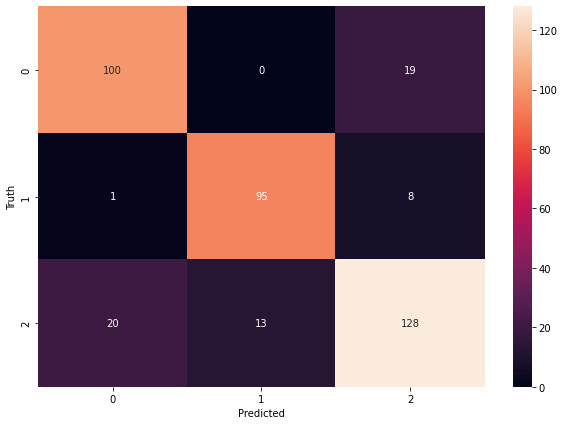

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65        23
           1       0.87      0.87      0.87        23
           2       0.80      0.70      0.74        50

    accuracy                           0.75        96
   macro avg       0.75      0.77      0.76        96
weighted avg       0.76      0.75      0.75        96



Text(69.0, 0.5, 'Truth')

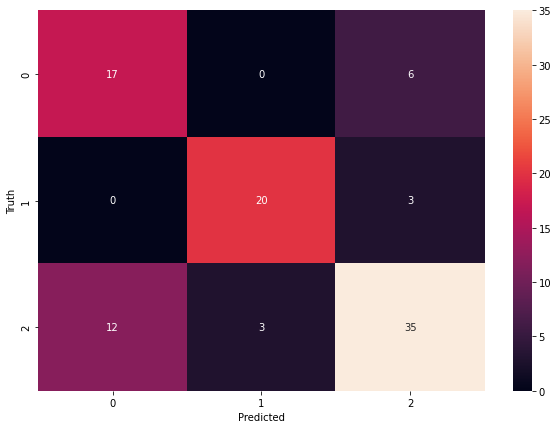

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-relu-4hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 1.1142 - accuracy: 0.2786 - val_loss: 1.1151 - val_accuracy: 0.2292
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1042 - accuracy: 0.3203 - val_loss: 1.1020 - val_accuracy: 0.2604
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0950 - accuracy: 0.3464 - val_loss: 1.0908 - val_accuracy: 0.4167
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0869 - accuracy: 0.3984 - val_loss: 1.0806 - val_accuracy: 0.4479
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0796 - accuracy: 0.4141 - val_loss: 1.0714 - val_accuracy: 0.4792
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0727 - accuracy: 0.4453 - val_loss: 1.0631 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0659 - accuracy: 0.4323 - val_loss: 1.0554 - val_accuracy: 0.5104
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

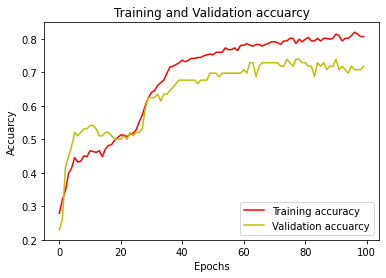

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       119
           1       0.86      0.92      0.89       104
           2       0.81      0.75      0.78       161

    accuracy                           0.82       384
   macro avg       0.82      0.83      0.83       384
weighted avg       0.82      0.82      0.82       384



Text(69.0, 0.5, 'Truth')

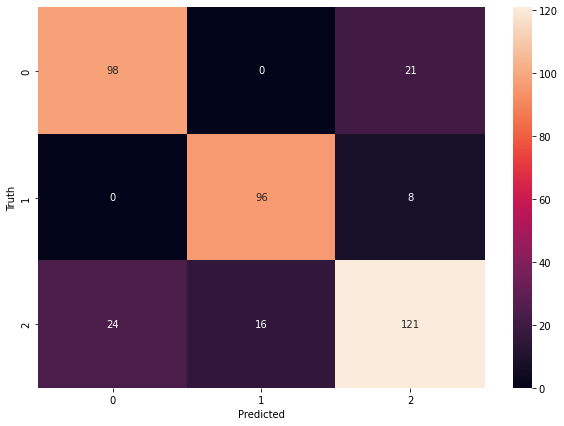

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        23
           1       0.87      0.87      0.87        23
           2       0.76      0.68      0.72        50

    accuracy                           0.72        96
   macro avg       0.72      0.73      0.72        96
weighted avg       0.73      0.72      0.72        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# SGD-relu-5hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1093 - accuracy: 0.2266 - val_loss: 1.1101 - val_accuracy: 0.1354
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1042 - accuracy: 0.2708 - val_loss: 1.1028 - val_accuracy: 0.2188
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0998 - accuracy: 0.3516 - val_loss: 1.0964 - val_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0962 - accuracy: 0.3854 - val_loss: 1.0907 - val_accuracy: 0.4688
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0930 - accuracy: 0.4193 - val_loss: 1.0855 - val_accuracy: 0.5312
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0901 - accuracy: 0.4115 - val_loss: 1.0805 - val_accuracy: 0.5521
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0873 - accuracy: 0.4297 - val_loss: 1.0758 - val_accuracy: 0.5521
Epoch 8/100


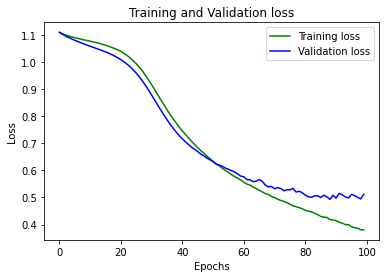

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

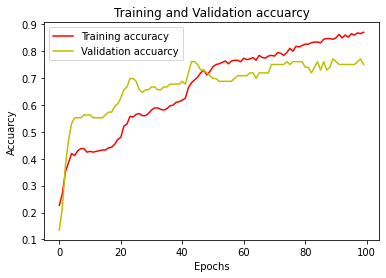

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       119
           1       0.95      0.95      0.95       104
           2       0.88      0.81      0.84       161

    accuracy                           0.88       384
   macro avg       0.88      0.89      0.88       384
weighted avg       0.88      0.88      0.87       384



Text(69.0, 0.5, 'Truth')

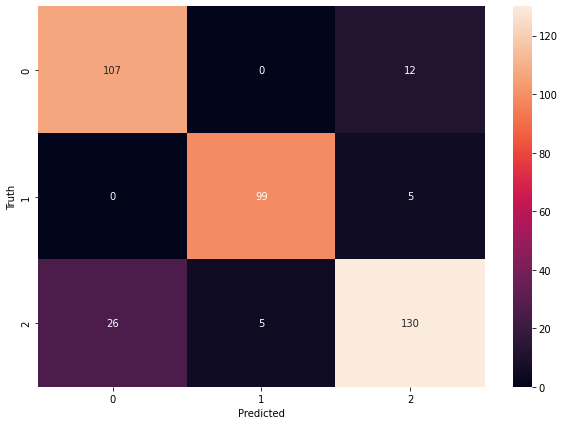

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.78      0.65        23
           1       1.00      0.78      0.88        23
           2       0.78      0.72      0.75        50

    accuracy                           0.75        96
   macro avg       0.78      0.76      0.76        96
weighted avg       0.78      0.75      0.76        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-SGD-relu-3hidden layers-68.75

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1733 - accuracy: 0.3177 - val_loss: 1.1236 - val_accuracy: 0.3125
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1634 - accuracy: 0.3099 - val_loss: 1.0968 - val_accuracy: 0.3229
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1414 - accuracy: 0.3359 - val_loss: 1.0771 - val_accuracy: 0.3750
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1197 - accuracy: 0.3594 - val_loss: 1.0653 - val_accuracy: 0.3854
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0974 - accuracy: 0.3776 - val_loss: 1.0558 - val_accuracy: 0.4271
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0890 - accuracy: 0.3958 - val_loss: 1.0485 - val_accuracy: 0.4688
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0993 - accuracy: 0.3385 - val_loss: 1.0422 - val_accuracy: 0.4896
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

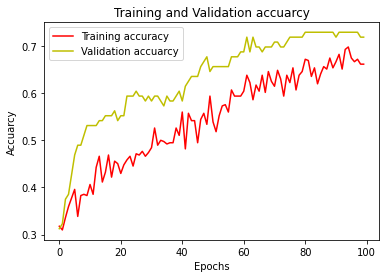

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       119
           1       0.81      0.93      0.87       104
           2       0.76      0.71      0.73       161

    accuracy                           0.78       384
   macro avg       0.79      0.80      0.79       384
weighted avg       0.78      0.78      0.78       384



Text(69.0, 0.5, 'Truth')

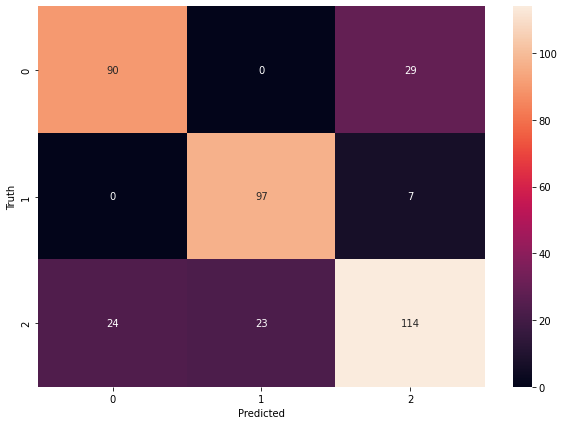

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.61      0.60        23
           1       0.80      0.87      0.83        23
           2       0.74      0.70      0.72        50

    accuracy                           0.72        96
   macro avg       0.71      0.73      0.72        96
weighted avg       0.72      0.72      0.72        96



Text(69.0, 0.5, 'Truth')

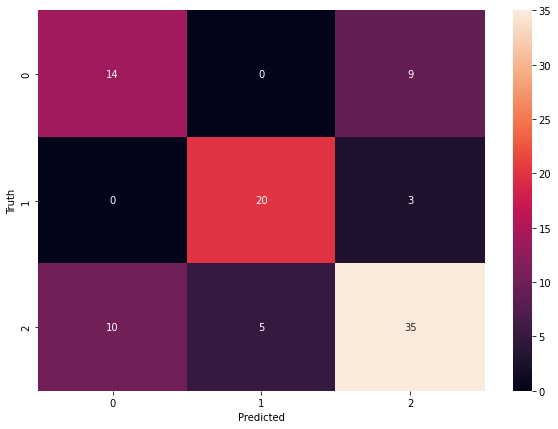

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-relu-4hidden layers-73

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.3),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.1642 - accuracy: 0.3932 - val_loss: 1.0765 - val_accuracy: 0.5208
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1380 - accuracy: 0.3594 - val_loss: 1.0756 - val_accuracy: 0.5208
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1353 - accuracy: 0.3698 - val_loss: 1.0751 - val_accuracy: 0.5208
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.3620 - val_loss: 1.0740 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1073 - accuracy: 0.4036 - val_loss: 1.0733 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1107 - accuracy: 0.3880 - val_loss: 1.0720 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.1145 - accuracy: 0.3984 - val_loss: 1.0710 - val_accuracy: 0.5208
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

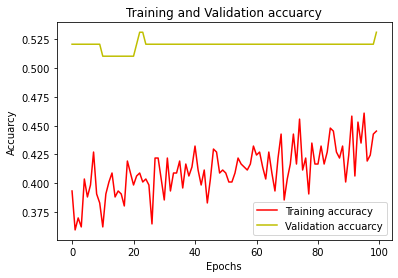

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.06      0.11       119
           1       0.93      0.12      0.22       104
           2       0.43      0.96      0.59       161

    accuracy                           0.45       384
   macro avg       0.63      0.38      0.31       384
weighted avg       0.60      0.45      0.34       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.09      0.15        23
           1       0.00      0.00      0.00        23
           2       0.53      0.98      0.69        50

    accuracy                           0.53        96
   macro avg       0.40      0.36      0.28        96
weighted avg       0.43      0.53      0.39        96



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(69.0, 0.5, 'Truth')

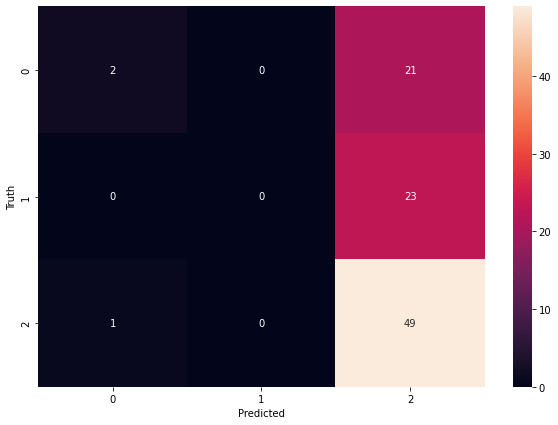

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-relu-5hidden layers-59

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1126 - accuracy: 0.4062 - val_loss: 1.0328 - val_accuracy: 0.5104
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0881 - accuracy: 0.3958 - val_loss: 1.0320 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0842 - accuracy: 0.4427 - val_loss: 1.0309 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0796 - accuracy: 0.4062 - val_loss: 1.0287 - val_accuracy: 0.4896
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0632 - accuracy: 0.4193 - val_loss: 1.0250 - val_accuracy: 0.4583
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0681 - accuracy: 0.4375 - val_loss: 1.0226 - val_accuracy: 0.4583
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0602 - accuracy: 0.4479 - val_loss: 1.0166 - val_accuracy: 0.4583
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.85      0.72       119
           1       0.74      0.96      0.83       104
           2       0.78      0.43      0.55       161

    accuracy                           0.70       384
   macro avg       0.72      0.75      0.70       384
weighted avg       0.72      0.70      0.68       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.83      0.56        23
           1       0.81      0.91      0.86        23
           2       0.80      0.40      0.53        50

    accuracy                           0.62        96
   macro avg       0.68      0.71      0.65        96
weighted avg       0.71      0.62      0.62        96



Text(69.0, 0.5, 'Truth')

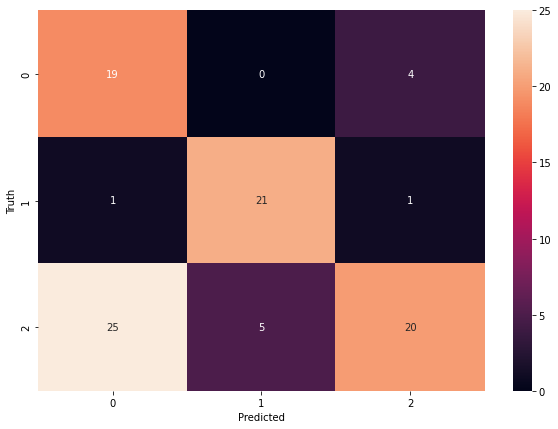

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-relu-3hidden layers-65

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 22ms/step - loss: 1.2799 - accuracy: 0.4453 - val_loss: 1.0631 - val_accuracy: 0.4792
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0450 - accuracy: 0.5156 - val_loss: 1.0352 - val_accuracy: 0.5521
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9379 - accuracy: 0.5833 - val_loss: 1.0060 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8246 - accuracy: 0.6406 - val_loss: 0.9774 - val_accuracy: 0.5521
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7361 - accuracy: 0.6823 - val_loss: 0.9427 - val_accuracy: 0.6042
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7375 - accuracy: 0.6719 - val_loss: 0.9122 - val_accuracy: 0.6250
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.7500 - val_loss: 0.8778 - val_accuracy: 0.6979
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

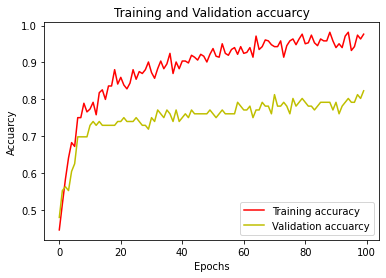

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      1.00      1.00       104
           2       1.00      0.99      0.99       161

    accuracy                           0.99       384
   macro avg       0.99      1.00      1.00       384
weighted avg       0.99      0.99      0.99       384



Text(69.0, 0.5, 'Truth')

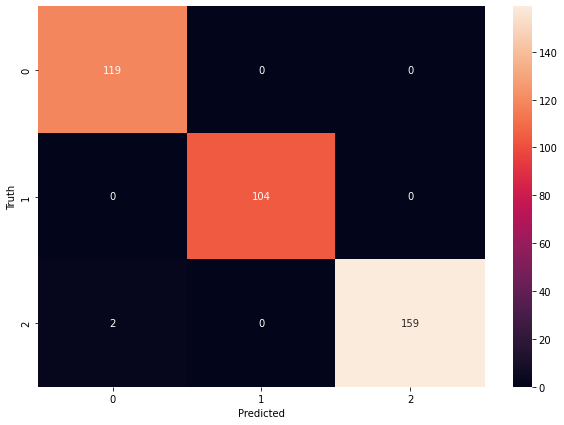

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.78      0.72        23
           1       1.00      0.83      0.90        23
           2       0.84      0.84      0.84        50

    accuracy                           0.82        96
   macro avg       0.84      0.82      0.82        96
weighted avg       0.84      0.82      0.83        96



Text(69.0, 0.5, 'Truth')

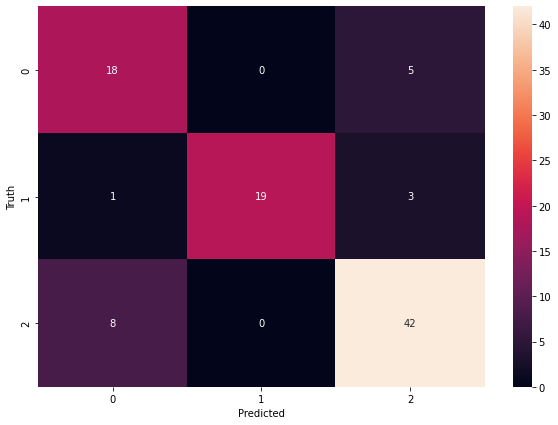

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-relu-4hidden layers-73

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 1.4391 - accuracy: 0.4010 - val_loss: 1.0713 - val_accuracy: 0.3438
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0881 - accuracy: 0.4818 - val_loss: 1.0334 - val_accuracy: 0.4792
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8839 - accuracy: 0.5964 - val_loss: 1.0052 - val_accuracy: 0.5104
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8059 - accuracy: 0.6172 - val_loss: 0.9794 - val_accuracy: 0.5417
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7393 - accuracy: 0.6510 - val_loss: 0.9528 - val_accuracy: 0.5625
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7026 - accuracy: 0.6953 - val_loss: 0.9299 - val_accuracy: 0.5729
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6850 - accuracy: 0.6953 - val_loss: 0.9019 - val_accuracy: 0.5833
Epoch 8/100


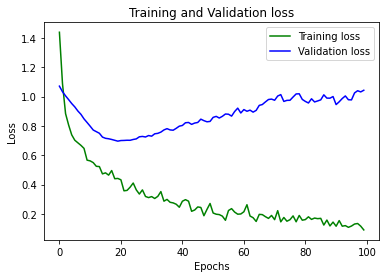

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

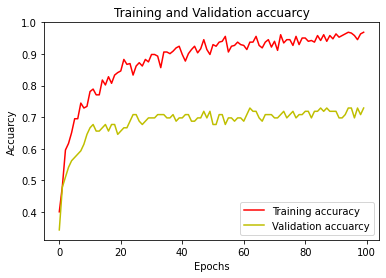

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       161

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Text(69.0, 0.5, 'Truth')

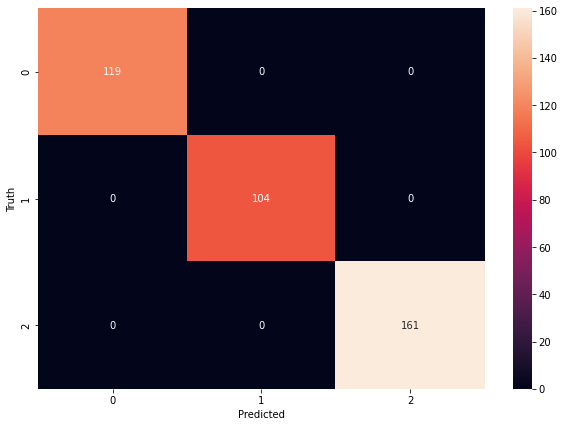

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.95      0.78      0.86        23
           2       0.75      0.72      0.73        50

    accuracy                           0.73        96
   macro avg       0.75      0.73      0.74        96
weighted avg       0.75      0.73      0.74        96



Text(69.0, 0.5, 'Truth')

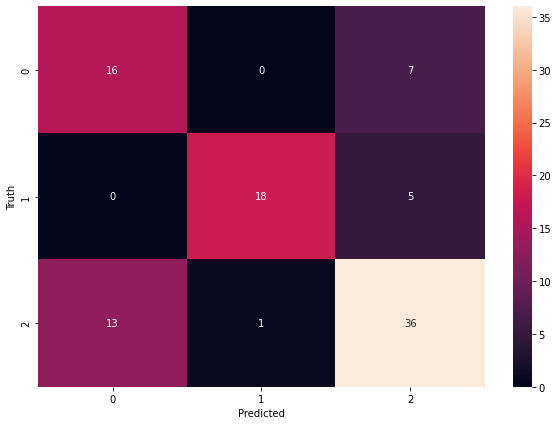

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-relu-5hidden layers-76

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 2s 28ms/step - loss: 1.5452 - accuracy: 0.3802 - val_loss: 1.0863 - val_accuracy: 0.4479
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2323 - accuracy: 0.4115 - val_loss: 1.0736 - val_accuracy: 0.5521
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0578 - accuracy: 0.4375 - val_loss: 1.0607 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9464 - accuracy: 0.5703 - val_loss: 1.0451 - val_accuracy: 0.5417
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9230 - accuracy: 0.5677 - val_loss: 1.0280 - val_accuracy: 0.5729
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8763 - accuracy: 0.5885 - val_loss: 1.0147 - val_accuracy: 0.5417
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8286 - accuracy: 0.5938 - val_loss: 1.0000 - val_accuracy: 0.5833
Epoch 8/100


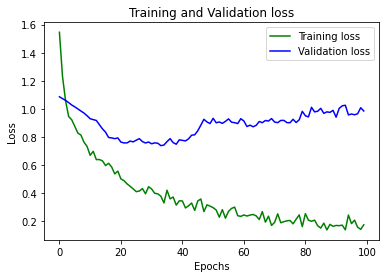

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       119
           1       1.00      0.99      1.00       104
           2       0.99      0.99      0.99       161

    accuracy                           0.99       384
   macro avg       1.00      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



Text(69.0, 0.5, 'Truth')

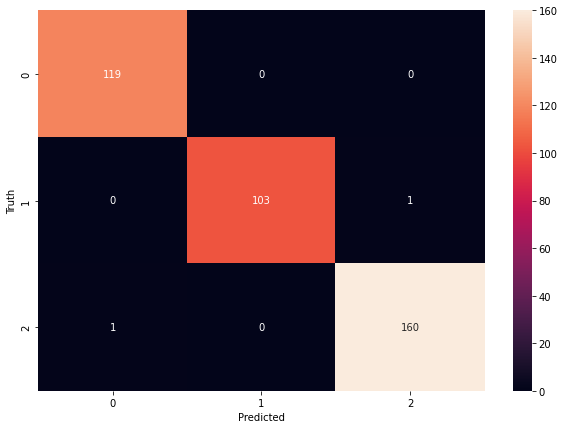

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.81      0.74      0.77        23
           2       0.74      0.68      0.71        50

    accuracy                           0.70        96
   macro avg       0.70      0.70      0.70        96
weighted avg       0.71      0.70      0.70        96



Text(69.0, 0.5, 'Truth')

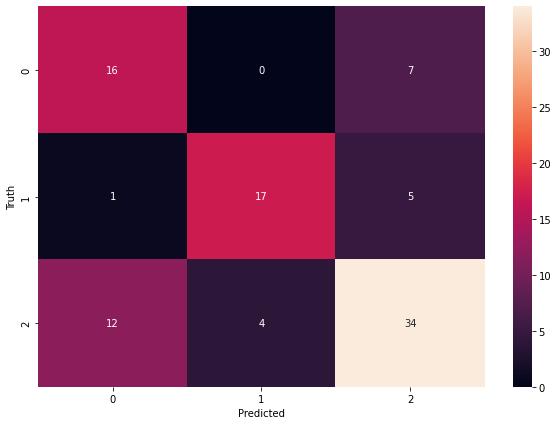

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-tanh-3hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1315 - accuracy: 0.3958 - val_loss: 1.1110 - val_accuracy: 0.3854
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9916 - accuracy: 0.5000 - val_loss: 1.0210 - val_accuracy: 0.4375
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9049 - accuracy: 0.5573 - val_loss: 0.9601 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8457 - accuracy: 0.5964 - val_loss: 0.9153 - val_accuracy: 0.4896
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.8041 - accuracy: 0.6328 - val_loss: 0.8808 - val_accuracy: 0.5104
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7732 - accuracy: 0.6615 - val_loss: 0.8518 - val_accuracy: 0.5208
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7483 - accuracy: 0.6771 - val_loss: 0.8274 - val_accuracy: 0.5729
Epoch 8/100


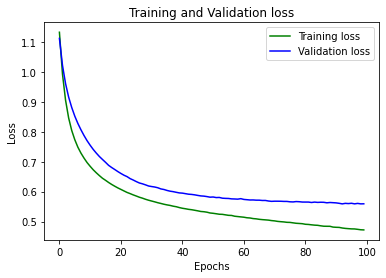

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       119
           1       0.86      0.91      0.89       104
           2       0.81      0.75      0.78       161

    accuracy                           0.82       384
   macro avg       0.82      0.83      0.83       384
weighted avg       0.82      0.82      0.82       384



Text(69.0, 0.5, 'Truth')

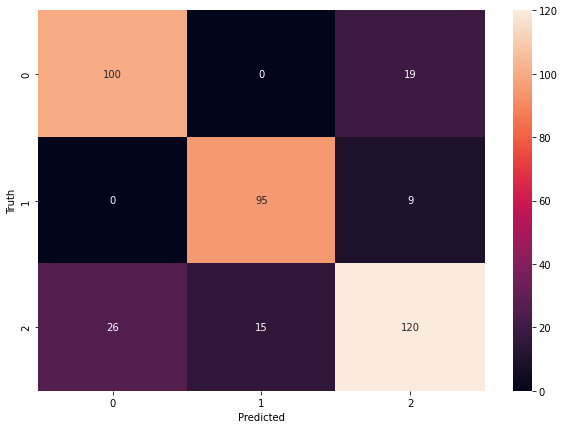

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.74      0.62        23
           1       0.87      0.87      0.87        23
           2       0.78      0.64      0.70        50

    accuracy                           0.72        96
   macro avg       0.73      0.75      0.73        96
weighted avg       0.74      0.72      0.72        96



Text(69.0, 0.5, 'Truth')

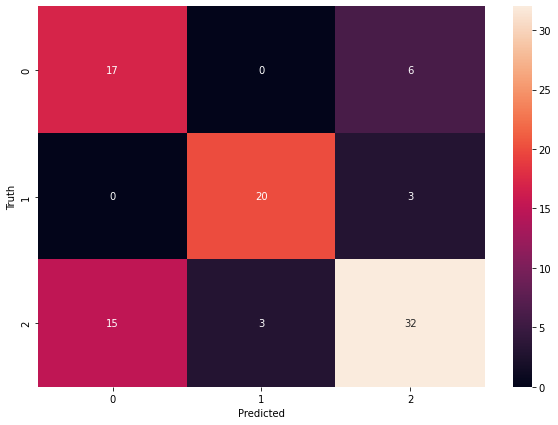

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-tanh-4hidden layers-74

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.0696 - accuracy: 0.4193 - val_loss: 1.0174 - val_accuracy: 0.4583
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9759 - accuracy: 0.5260 - val_loss: 0.9462 - val_accuracy: 0.5104
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9130 - accuracy: 0.5911 - val_loss: 0.8945 - val_accuracy: 0.5625
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8671 - accuracy: 0.6276 - val_loss: 0.8555 - val_accuracy: 0.5625
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8321 - accuracy: 0.6458 - val_loss: 0.8254 - val_accuracy: 0.6042
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.6667 - val_loss: 0.8015 - val_accuracy: 0.5938
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7825 - accuracy: 0.6641 - val_loss: 0.7824 - val_accuracy: 0.5833
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

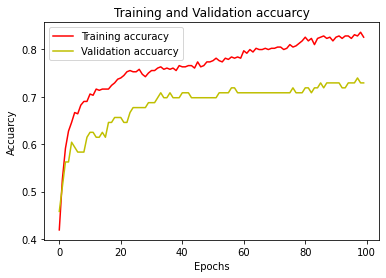

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       119
           1       0.90      0.92      0.91       104
           2       0.82      0.76      0.79       161

    accuracy                           0.83       384
   macro avg       0.83      0.84      0.84       384
weighted avg       0.83      0.83      0.83       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.78      0.64        23
           1       0.90      0.83      0.86        23
           2       0.79      0.66      0.72        50

    accuracy                           0.73        96
   macro avg       0.75      0.76      0.74        96
weighted avg       0.76      0.73      0.73        96



Text(69.0, 0.5, 'Truth')

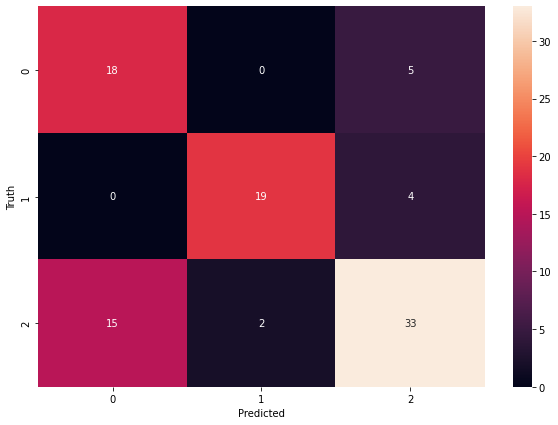

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-tanh-5hidden layers-76

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 19ms/step - loss: 1.1004 - accuracy: 0.4062 - val_loss: 0.9624 - val_accuracy: 0.4062
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9221 - accuracy: 0.4896 - val_loss: 0.8849 - val_accuracy: 0.4167
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8430 - accuracy: 0.5729 - val_loss: 0.8427 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7953 - accuracy: 0.6120 - val_loss: 0.8155 - val_accuracy: 0.5417
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 0.7615 - accuracy: 0.6406 - val_loss: 0.7942 - val_accuracy: 0.5521
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7363 - accuracy: 0.6615 - val_loss: 0.7785 - val_accuracy: 0.5521
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.6667 - val_loss: 0.7641 - val_accuracy: 0.5625
Epoch 8/100


In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       119
           1       0.89      0.93      0.91       104
           2       0.85      0.78      0.81       161

    accuracy                           0.85       384
   macro avg       0.85      0.86      0.85       384
weighted avg       0.85      0.85      0.85       384



In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

Validation Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.86      0.83      0.84        23
           2       0.77      0.74      0.76        50

    accuracy                           0.75        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.76      0.75      0.75        96



In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(69.0, 0.5, 'Truth')

# Dropout-SGD-tanh-3hidden layers-71

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 1.1205 - accuracy: 0.3776 - val_loss: 1.0283 - val_accuracy: 0.3958
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0189 - accuracy: 0.4609 - val_loss: 0.9894 - val_accuracy: 0.4479
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9800 - accuracy: 0.5052 - val_loss: 0.9568 - val_accuracy: 0.4792
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.9304 - accuracy: 0.5312 - val_loss: 0.9365 - val_accuracy: 0.5208
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.9288 - accuracy: 0.5182 - val_loss: 0.9152 - val_accuracy: 0.5208
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8977 - accuracy: 0.5807 - val_loss: 0.8997 - val_accuracy: 0.5625
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8446 - accuracy: 0.5729 - val_loss: 0.8841 - val_accuracy: 0.5729
Epoch 8/100


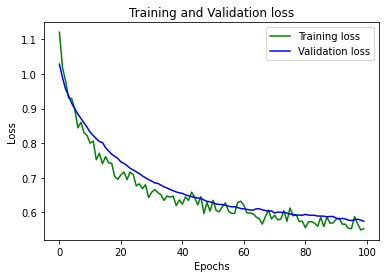

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

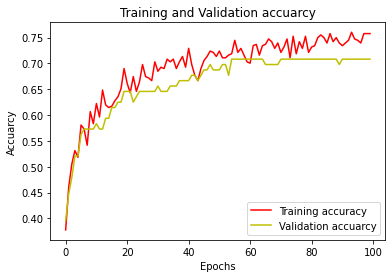

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-tanh-4hidden layers-70

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-tanh-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-tanh-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-tanh-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-tanh-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(60, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(30, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(80, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(90, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(50, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SGD-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(70, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt=keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, batch_size=0, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-SGD-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-SGD-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-relu-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-relu-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-relu-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-relu-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-relu-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-relu-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-relu-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-relu-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-relu-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-tanh-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-tanh-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-tanh-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-tanh-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-tanh-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-tanh-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-tanh-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-tanh-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-tanh-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='tanh'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# rms-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Dropout-rms-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-sigmoid-3hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-sigmoid-4hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Batch-rms-sigmoid-5hidden layers

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_predicted_train = model.predict(X_train)
y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
y_predicted = model.predict(X_val)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Model with L2 regularisation 

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu',activity_regularizer = regularizers.l2(0.3)),
   keras.layers.Dense(30, activation='sigmoid',activity_regularizer=regularizers.l2(0.2)),
   keras.layers.Dense(30, activation='tanh',activity_regularizer=regularizers.l2(0.2)),
   keras.layers.Dense(20, activation='relu',activity_regularizer=regularizers.l2(0.1)),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(0,100)
plt.plot(epochs,acc_train,'r',label='Training accuracy')
plt.plot(epochs,acc_val,'y',label='Validation accuarcy')
plt.title('Training and Validation accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()
plt.show()

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))

In [ ]:
y_pred = model.predict(X_val)
y_pred_classes = [np.argmax(element)for element in y_pred]
print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(30, activation='relu'),
   keras.layers.Dropout(0.1),
   keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_val,y_val))

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,100)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_val,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Kfold Cross Entropy

## model1

In [ ]:
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.Dense(3, activation='softmax')
    ])
  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
   # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_data=(X_val,y_val))
   # Generate generalization metrics
  scores = model.evaluate(X_val, y_val, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  #-----------Train----------
  y_pred_train = model.predict(X_train)
  y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
  print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))
  y_predicted_train = model.predict(X_train)
  y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
  cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #-------------Val------------
  y_pred = model.predict(X_val)
  y_pred_classes = [np.argmax(element)for element in y_pred]
  print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))
  y_predicted = model.predict(X_val)
  y_predicted_labels = [np.argmax(i) for i in y_predicted]
  cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #----------------------------
   # Increase fold number
  fold_no = fold_no + 1
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'* Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'* Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'* Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

## model2

In [ ]:
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(X)
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(20, activation='relu'),
   keras.layers.Dropout(0.2),
   keras.layers.Dense(3, activation='softmax')
   ])
  opt = keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
   # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_data=(X_val,y_val))#, validation_data=(X_val,y_val))
   # Generate generalization metrics
  scores = model.evaluate(X_val, y_val, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  #-----------Train----------
  y_pred_train = model.predict(X_train)
  y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
  print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))
  y_predicted_train = model.predict(X_train)
  y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
  cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #-------------Val------------
  y_pred = model.predict(X_val)
  y_pred_classes = [np.argmax(element)for element in y_pred]
  print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))
  y_predicted = model.predict(X_val)
  y_predicted_labels = [np.argmax(i) for i in y_predicted]
  cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #----------------------------
   # Increase fold number
  fold_no = fold_no + 1
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'* Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'* Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'* Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

## model3

In [ ]:
kf = KFold(n_splits=5,shuffle = True)
kf.get_n_splits(X)
fold_no = 1
acc_per_fold = []
loss_per_fold = []
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  model = keras.Sequential([
   keras.layers.Dense(50, input_shape=(16,), activation = 'sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(20, activation='sigmoid'),
   keras.layers.BatchNormalization(),
   keras.layers.Dense(3, activation='softmax')
   ])
  opt = keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(optimizer=opt,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_data=(X_val,y_val))#, validation_data=(X_val,y_val))
   #generalization metrics
  scores = model.evaluate(X_val, y_val, verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  #-----------Train----------
  y_pred_train = model.predict(X_train)
  y_pred_classes_train = [np.argmax(element)for element in y_pred_train]
  print("Train Classification Report: \n",classification_report(y_train,y_pred_classes_train))
  y_predicted_train = model.predict(X_train)
  y_predicted_labels_train = [np.argmax(i) for i in y_predicted_train]
  cm = tf.math.confusion_matrix(labels=y_train,predictions=y_predicted_labels_train)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #-------------Val------------
  y_pred = model.predict(X_val)
  y_pred_classes = [np.argmax(element)for element in y_pred]
  print("Validation Classification Report: \n",classification_report(y_val,y_pred_classes))
  y_predicted = model.predict(X_val)
  y_predicted_labels = [np.argmax(i) for i in y_predicted]
  cm = tf.math.confusion_matrix(labels=y_val,predictions=y_predicted_labels)
  plt.figure(figsize = (10,7))
  sn.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')
  #----------------------------
   #go next fold
  fold_no = fold_no + 1
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'* Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'* Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'* Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')